# Statistical Analysis with R

## Simple statistics on simulated samples
> Study of the different modes of graphical description in the continuous and discrete cases as well as probability calculations.
> ***
> ### Continuous probability distribution
> The aim here is to simulate samples x of various sizes of $n$ of different distributions to analyze the results of the unbiased estimates of the mean and the variance as well as the distribution of the realizations of the sample.

In [1]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 150)

> ***
> #### $U_{[a,b]}$ distribution with $a = -1$ and $b = 2$
> - Distriution parameters.

In [2]:
a <- -1
b <- 2
m <- (a+b)/2
v <- ((b-a)^2)/12

> - Unbiased estimators.

In [3]:
n <- 10000
x <- runif(n=n, min=a, max=b)
m.est <- mean(x) 
v.est <- var(x)

> - Comparing the value of the unbiased estimator with its respective parameter for a sample of size $n$.

In [4]:
cat("Mean: ", m," | Unbiased estimator: ", m.est, "\nSDev: ", v,"| Unbiased estimator: ", v.est)

Mean:  0.5  | Unbiased estimator:  0.5099491 
SDev:  0.75 | Unbiased estimator:  0.7564043

> - Plotting the distribution of the sample of size $n$.

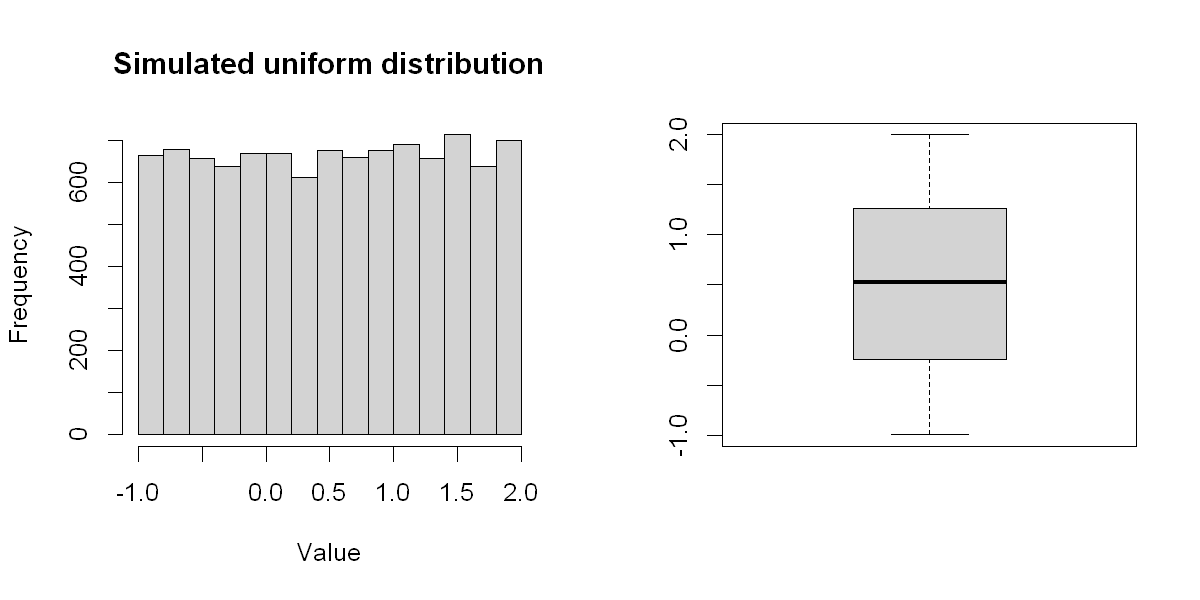

In [5]:
par(mfrow=c(1,2))
hist(x, main="Simulated uniform distribution", xlab="Value", ylab="Frequency")
boxplot(x)

>***
> #### $N_{(m, \sigma^2)}$ distribution with $m = -2$ and $\sigma = 1$
> - Distribution parameters.

In [6]:
m <- -2
v <- 1

> - Unbiased estimators.

In [7]:
n <- 10000
x <- rnorm(n=n, mean=m, sd=sqrt(v))
m.est <- mean(x) 
v.est <- var(x)

> - Comparing the value of the unbiased estimator with its respective parameter for a sample of size $n$.

In [8]:
cat("Mean:", m,"| Unbiased estimator:", m.est, "\nSDev: ", v,"| Unbiased estimator: ", v.est)

Mean: -2 | Unbiased estimator: -1.988361 
SDev:  1 | Unbiased estimator:  1.026205

> - Plotting the distribution of the sample of size $n$.

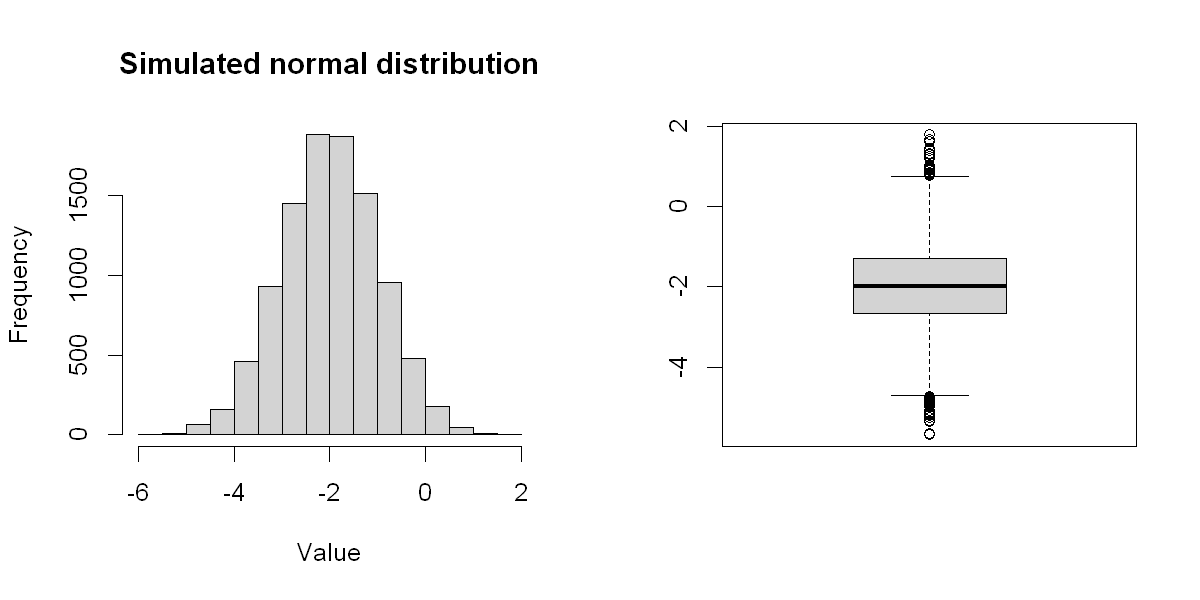

In [9]:
par(mfrow=c(1,2))
hist(x, main="Simulated normal distribution", xlab="Value", ylab="Frequency")
boxplot(x)

***
## Asymptotic behavior of estimators 
> Descriptive statistics, histograms, frequency distributions of samples of estimators.
> ***
> ### Simulation and estimation of the standard deviation for a $N(\mu,\sigma ^2)$ distribution

In [10]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 180)

> - Parameters.

In [11]:
ds1 <- NULL
ds2 <- NULL
ds3 <- NULL
n <- 100
K <- 100
m <- 2
sigma <- 0.1

> - Computation of three different estimators of $\sigma$.

In [12]:
for (k in 1:K) { 
    x <- rnorm(n=n,mean=m,sd=sigma)
    ds1 <- c(ds1, sum((x-mean(x))^2)/n)
    ds2 <- c(ds2, sum((x-mean(x))^2)/(n-1))
    ds3 <- c(ds3, sum((x-m)^2)/n)
}

> - Plotting the different estimation samples compared to $\sigma$ (horizontal line).

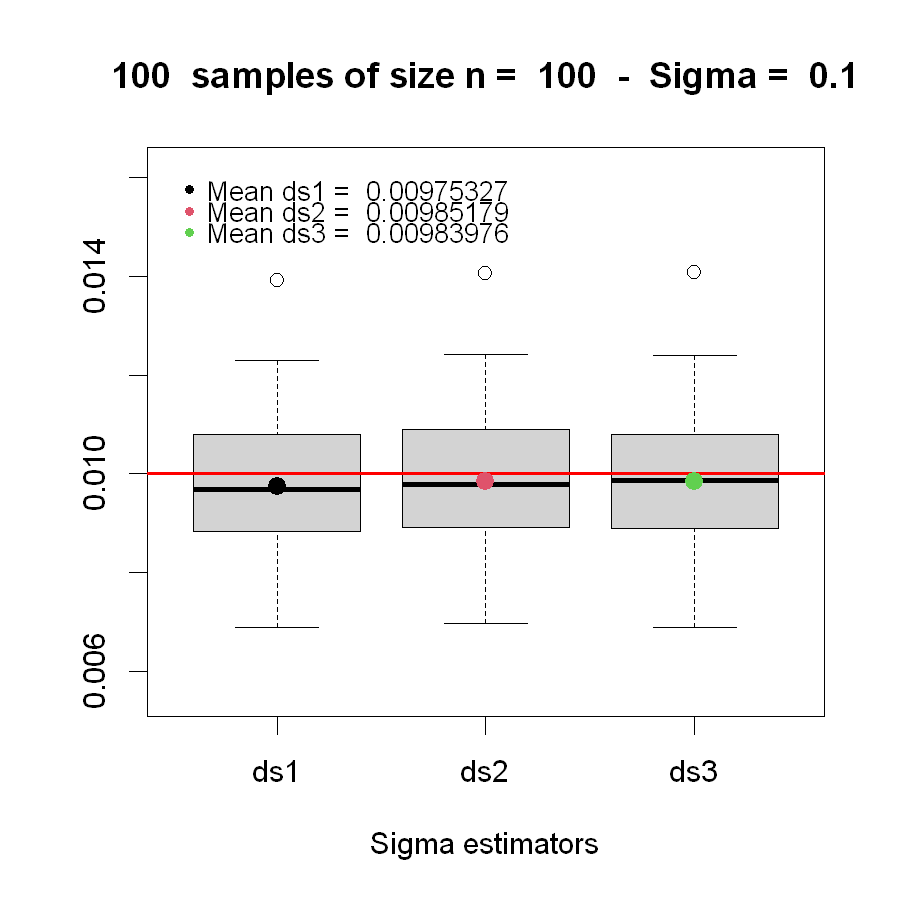

In [13]:
boxplot(c(ds1,ds2,ds3)~rep(c("ds1","ds2","ds3"),each=K),
        ylim=c(min(c(ds1,ds2,ds3))*0.8,max(c(ds1,ds2,ds3))*1.15),
        range=1.5,
        xlab="Sigma estimators",
        ylab="")

abline(h=sigma^2,col="red",lwd=2)

points(1:3,
       c(mean(ds1),mean(ds2),mean(ds3)),
       pch=20,
       col=1:3,
       cex=2) 

title(paste(K, " samples of size n = ",n," -  Sigma = ",sigma))

legend(0.5,
       max(c(ds1,ds2,ds3)*1.15),
       legend=c(paste("Mean ds1 = ",round(mean(ds1),digits=8)),
                paste("Mean ds2 = ",round(mean(ds2),digits=8)),
                paste("Mean ds3 = ",round(mean(ds3),digits=8))),
                pch=20,col=1:3,pt.cex=1,cex=0.9,bty="n")

> ***
> ### Simulation and estimation for a $P(\lambda)$ distribution

In [14]:
options(repr.plot.width=12, repr.plot.height=3, repr.plot.res = 180)

> - Parameters.

In [15]:
K <- 1000
N <- c(5,10,25,50,100,500,1000)
m <- NULL 
sigma2 <- NULL 
lambda <- 1

> - Computation of the estimators for different samples of size $n$.

In [16]:
for (n in N) {
    for (k in 1:K) { x <-rpois(n=n,lambda=1); m <- c(m,mean(x)); sigma2 <- c(sigma2,var(x)) }
}

> - Plotting the estimation of $m$ and $\sigma$ for different sample sizes.

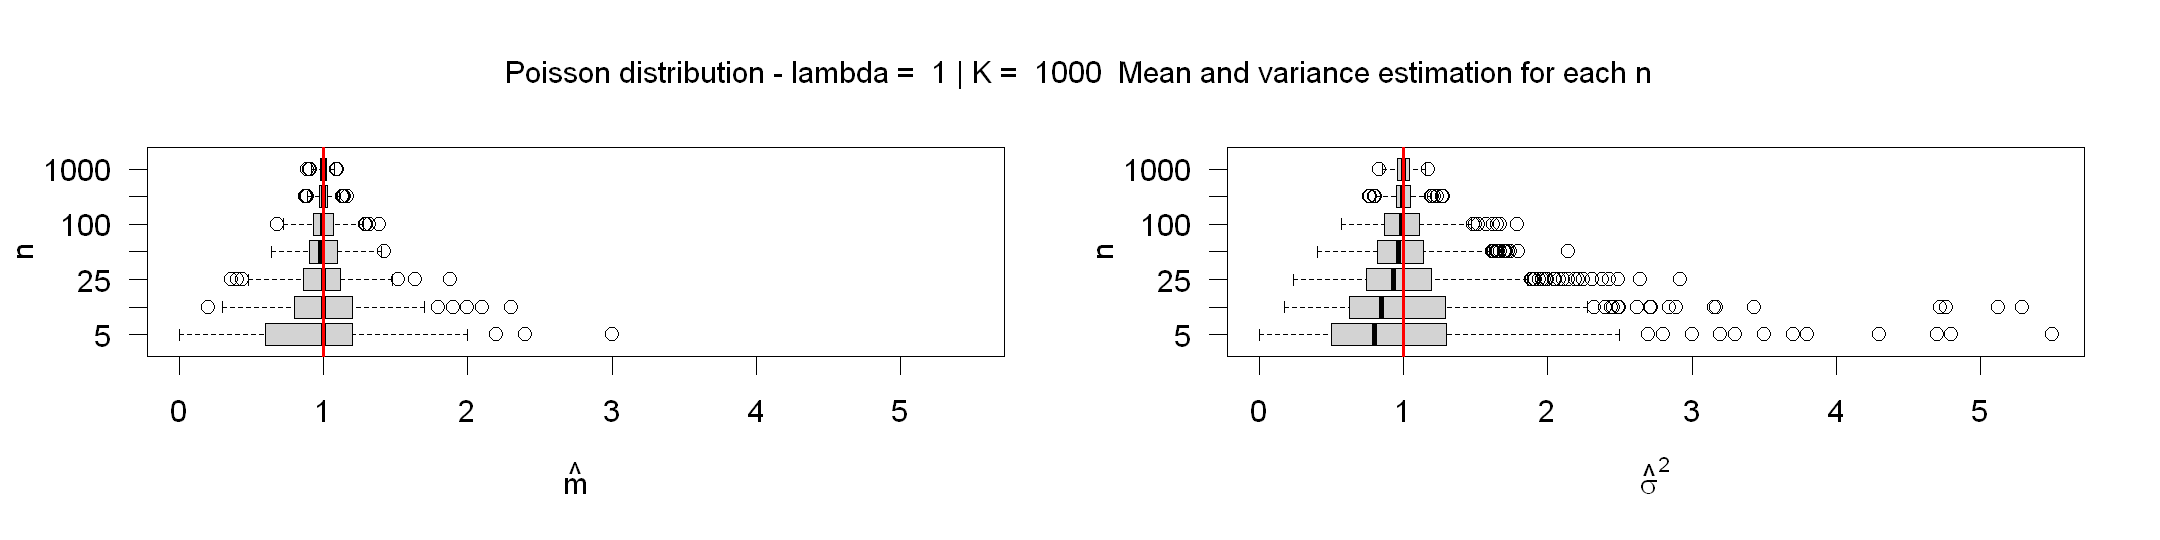

In [17]:
y.min <- min(c(m,sigma2))
y.max <- max(c(m,sigma2))

par(mfrow=c(1,2))

boxplot(m~rep(N,each=K),
        ylim=c(y.min,y.max),
        xlab=expression(paste(hat(m))),
        ylab='n',
        horizontal=TRUE,
        las=1)
abline(v=lambda,col="red",lwd=2)

boxplot(sigma2~rep(N,each=K),
        ylim=c(y.min,y.max),
        xlab=expression(paste(hat(sigma)^2)),
        ylab='n',
        horizontal=TRUE,
        las=1)
abline(v=lambda,col="red",lwd=2)

mtext(paste("Poisson distribution - lambda = ", lambda, "| K = ",K, " Mean and variance estimation for each n"), side = 3, line = -2.5, outer = TRUE)

***
## Point estimation
> ### Estimation of parameter $a$ from a distribution $U_{[0,a]}$
> - Empirical distribution of **Method of moment estimator** : $\hat a_1 = 2\hat m$

In [18]:
emp.distrib.a1hat <- function(a,n) { 
    return (2*apply(matrix(runif(n*1000,min=0,max=a),ncol=n),MARGIN=1,FUN=mean))
}

> - Denstity of the **maximum likelihood estimator** : $\hat a_2 = \max\limits_{i}(X_i)$

In [19]:
dens.a2hat <- function(y,a,n) {
    ymin <- 1e-10 
    y[y<=0] <- ymin 
    y[y>a] <- ymin 
    return(n*y^(n-1)/(a^n))
}

> - Denstity of the **Minimum-variance unbiased estimator** $\hat a_3 = \frac{n+1}{n}\hat a_2$ : 

In [20]:
dens.a3hat <- function(y,a,n) {
    return(n*dens.a2hat(n*y/(n+1),a,n)/(n+1))
}

> - Parameters $a=5$.

In [21]:
a <- 5

> - Function plotting **density** or **distribution** of all estimators on one graph.

In [22]:
all.plots <- function(n){
    
    h.simul <- hist(emp.distrib.a1hat(a,n),plot=FALSE)
    x.lim <- c(0,10)
    y.lim <- c(0,max(c(n/a,sqrt((3*n)/(2*pi))/a,n^2/((n+1)*a),max(h.simul$density))))

    hist(emp.distrib.a1hat(a,n),freq=FALSE,main="",xlim=x.lim*1.05,ylim=y.lim*1.05,col=col[1],axes=TRUE,xlab = "y",ylab=expression(f[Y](y)))

    curve(dnorm(x,mean=a,sd=a/sqrt(3*n)),from=x.lim[1], to=x.lim[2],type="l",col=col[2],lwd=2,add=TRUE)

    curve(dens.a2hat(x,a=a,n=n),from=0,to=a,n=1000,type="l",col=col[3],lwd=2,add=TRUE)

    curve(n*dens.a2hat(n*x/(n+1),a=a,n=n)/(n+1),from=0,to=(n+1)*a/n,n=1000,type="l",col=col[4],lwd=2,add=TRUE)

    abline(v=c(a,(n+1)*a/n),lty=2,col=col[2:3]) 

    abline(h=0,lty=3)

    legend(x.lim[1]-0.5,y.lim[2]*1.1,
           legend=c(expression(paste("Empirical distribution of ",hat(a)[1])),
                    expression(paste("Distribution N(a, a^2/(3*n))")),
                    expression(paste("Density of ",hat(a)[2])),
                    expression(paste("Density of ",hat(a)[3]))),pch=20,col=col,pt.cex=1,cex=1,bty="n")

    title(paste(" n = ",n))
}

> - Plotting for different n to observe the **convergence** of the estimators.

In [23]:
options(repr.plot.width=14, repr.plot.height=10, repr.plot.res = 180)

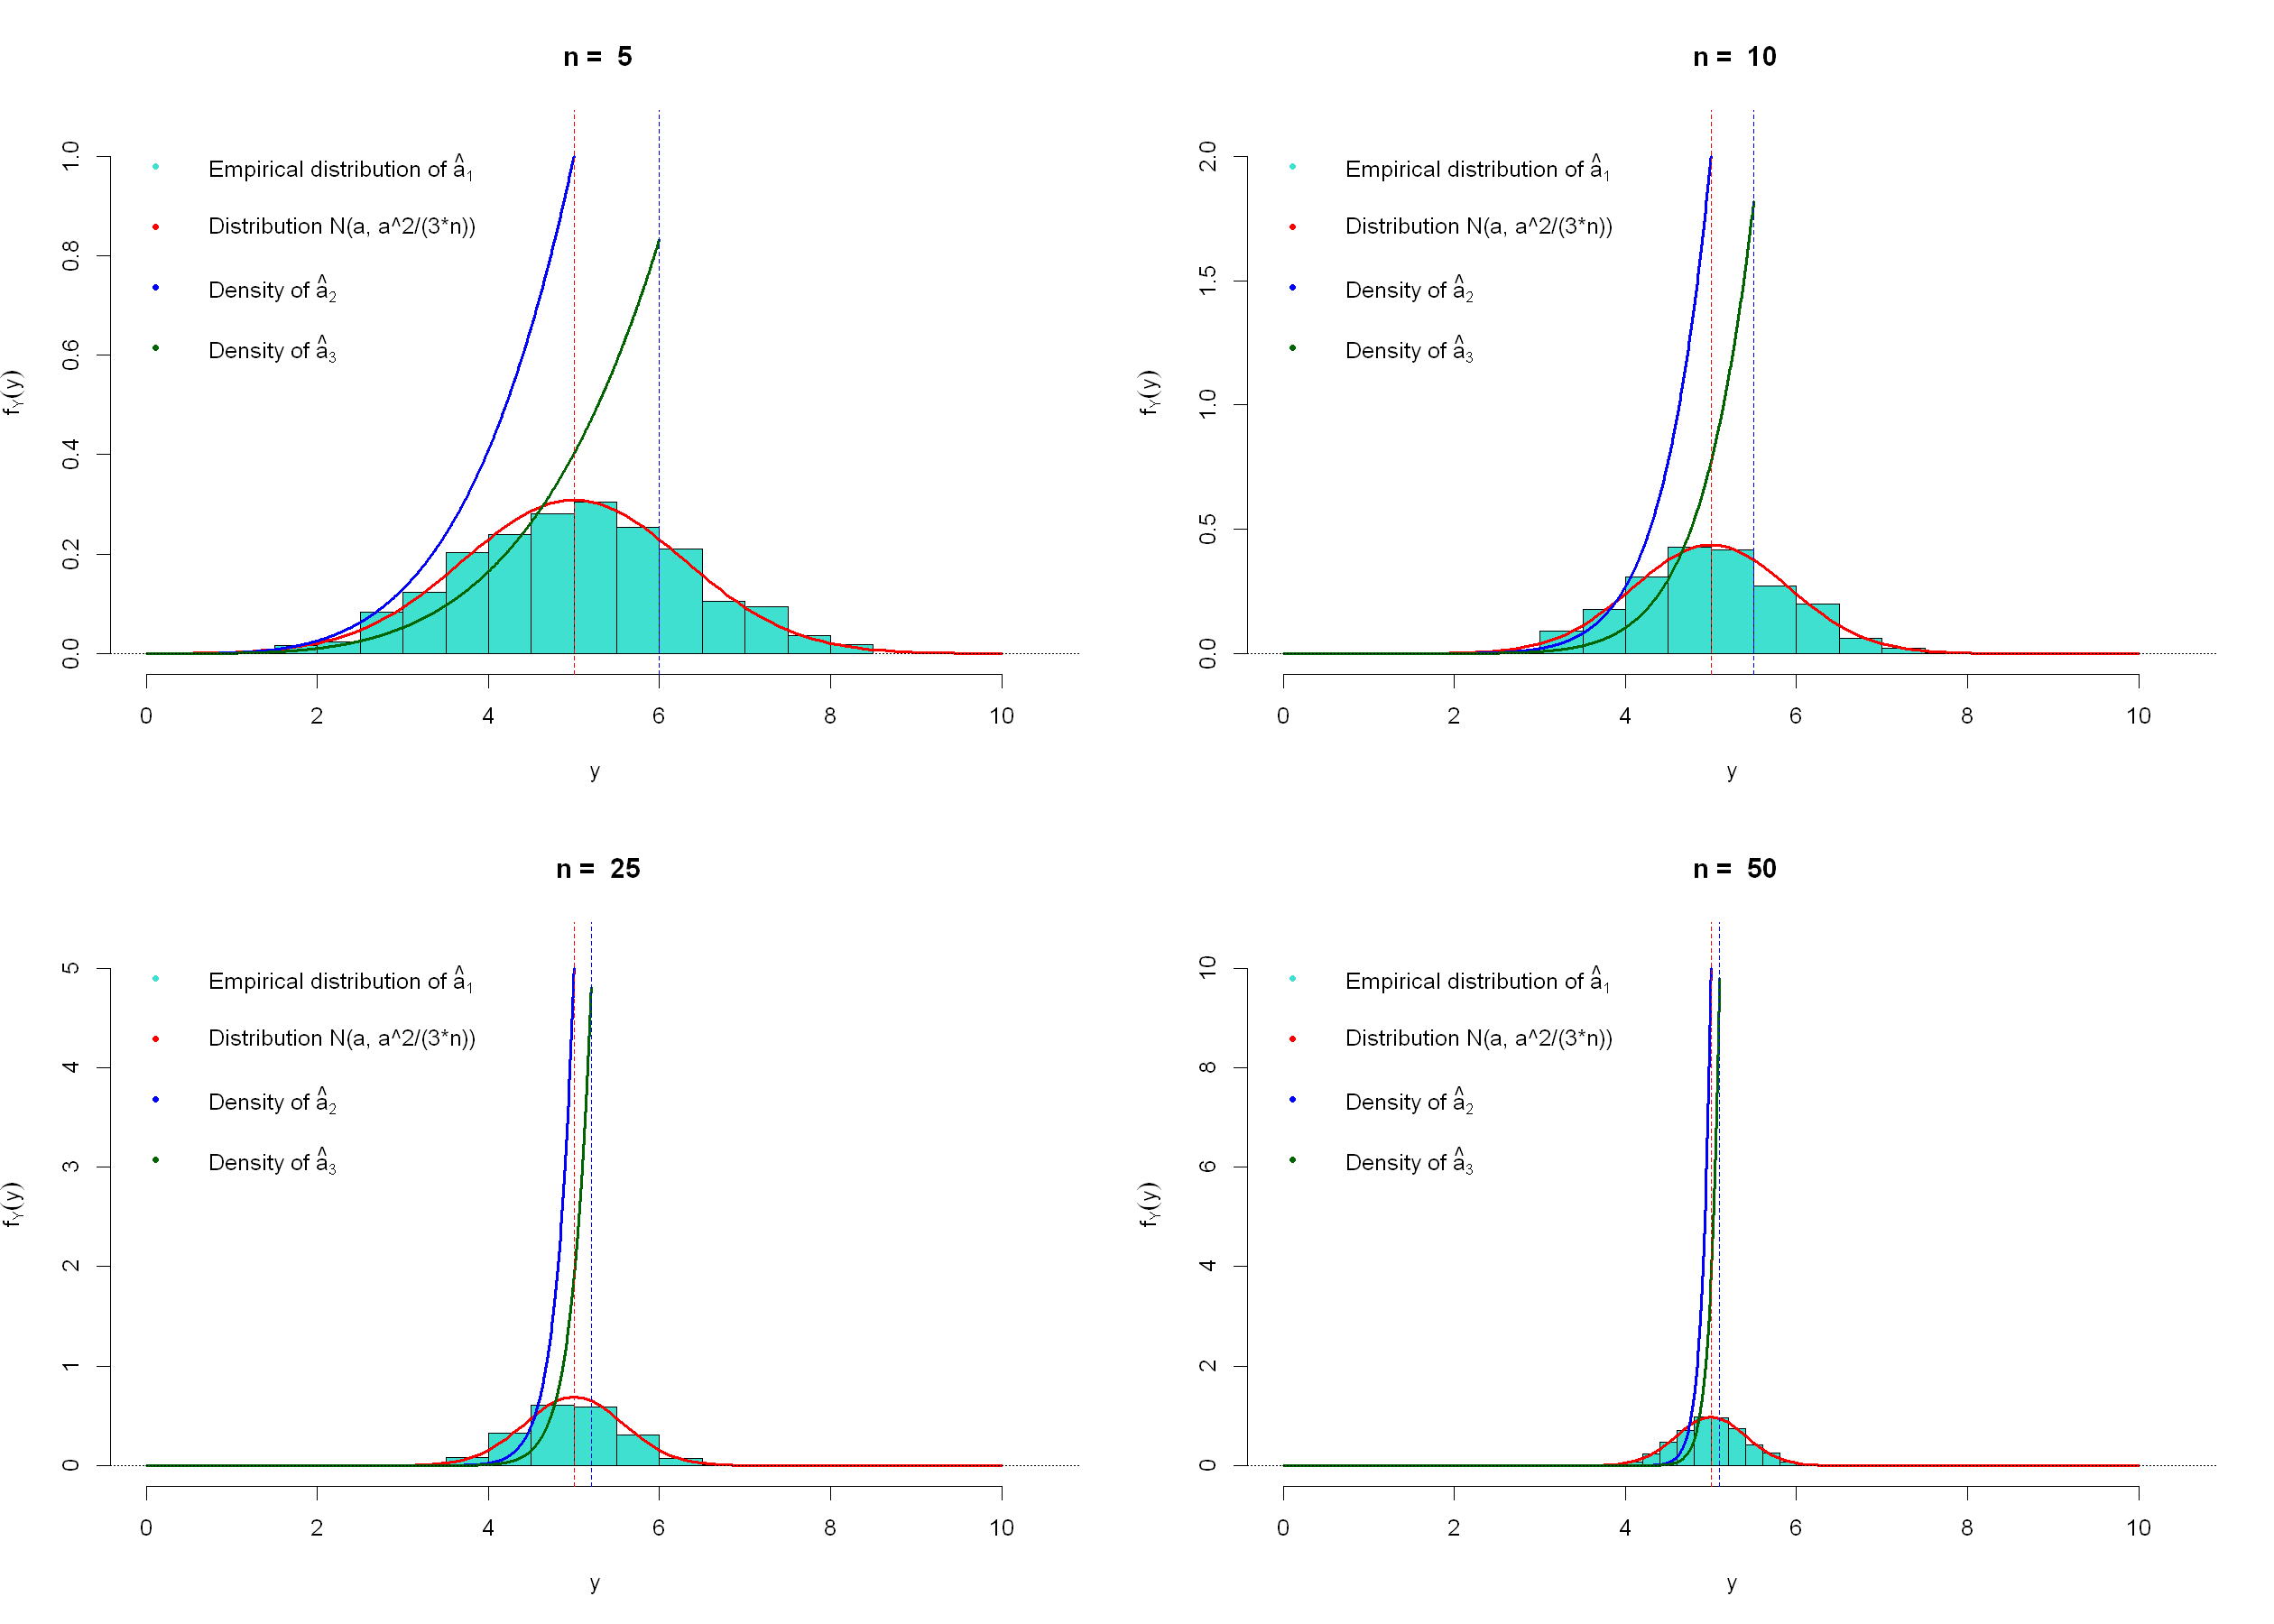

In [24]:
col <- c("turquoise","red","blue","darkgreen") 

par(mfrow=c(2,2))

seq.n <- c(5, 10, 25, 50)
for(n in seq.n) {all.plots(n)}

> - Box-plotting for different n to observe the **convergence** of the estimators.

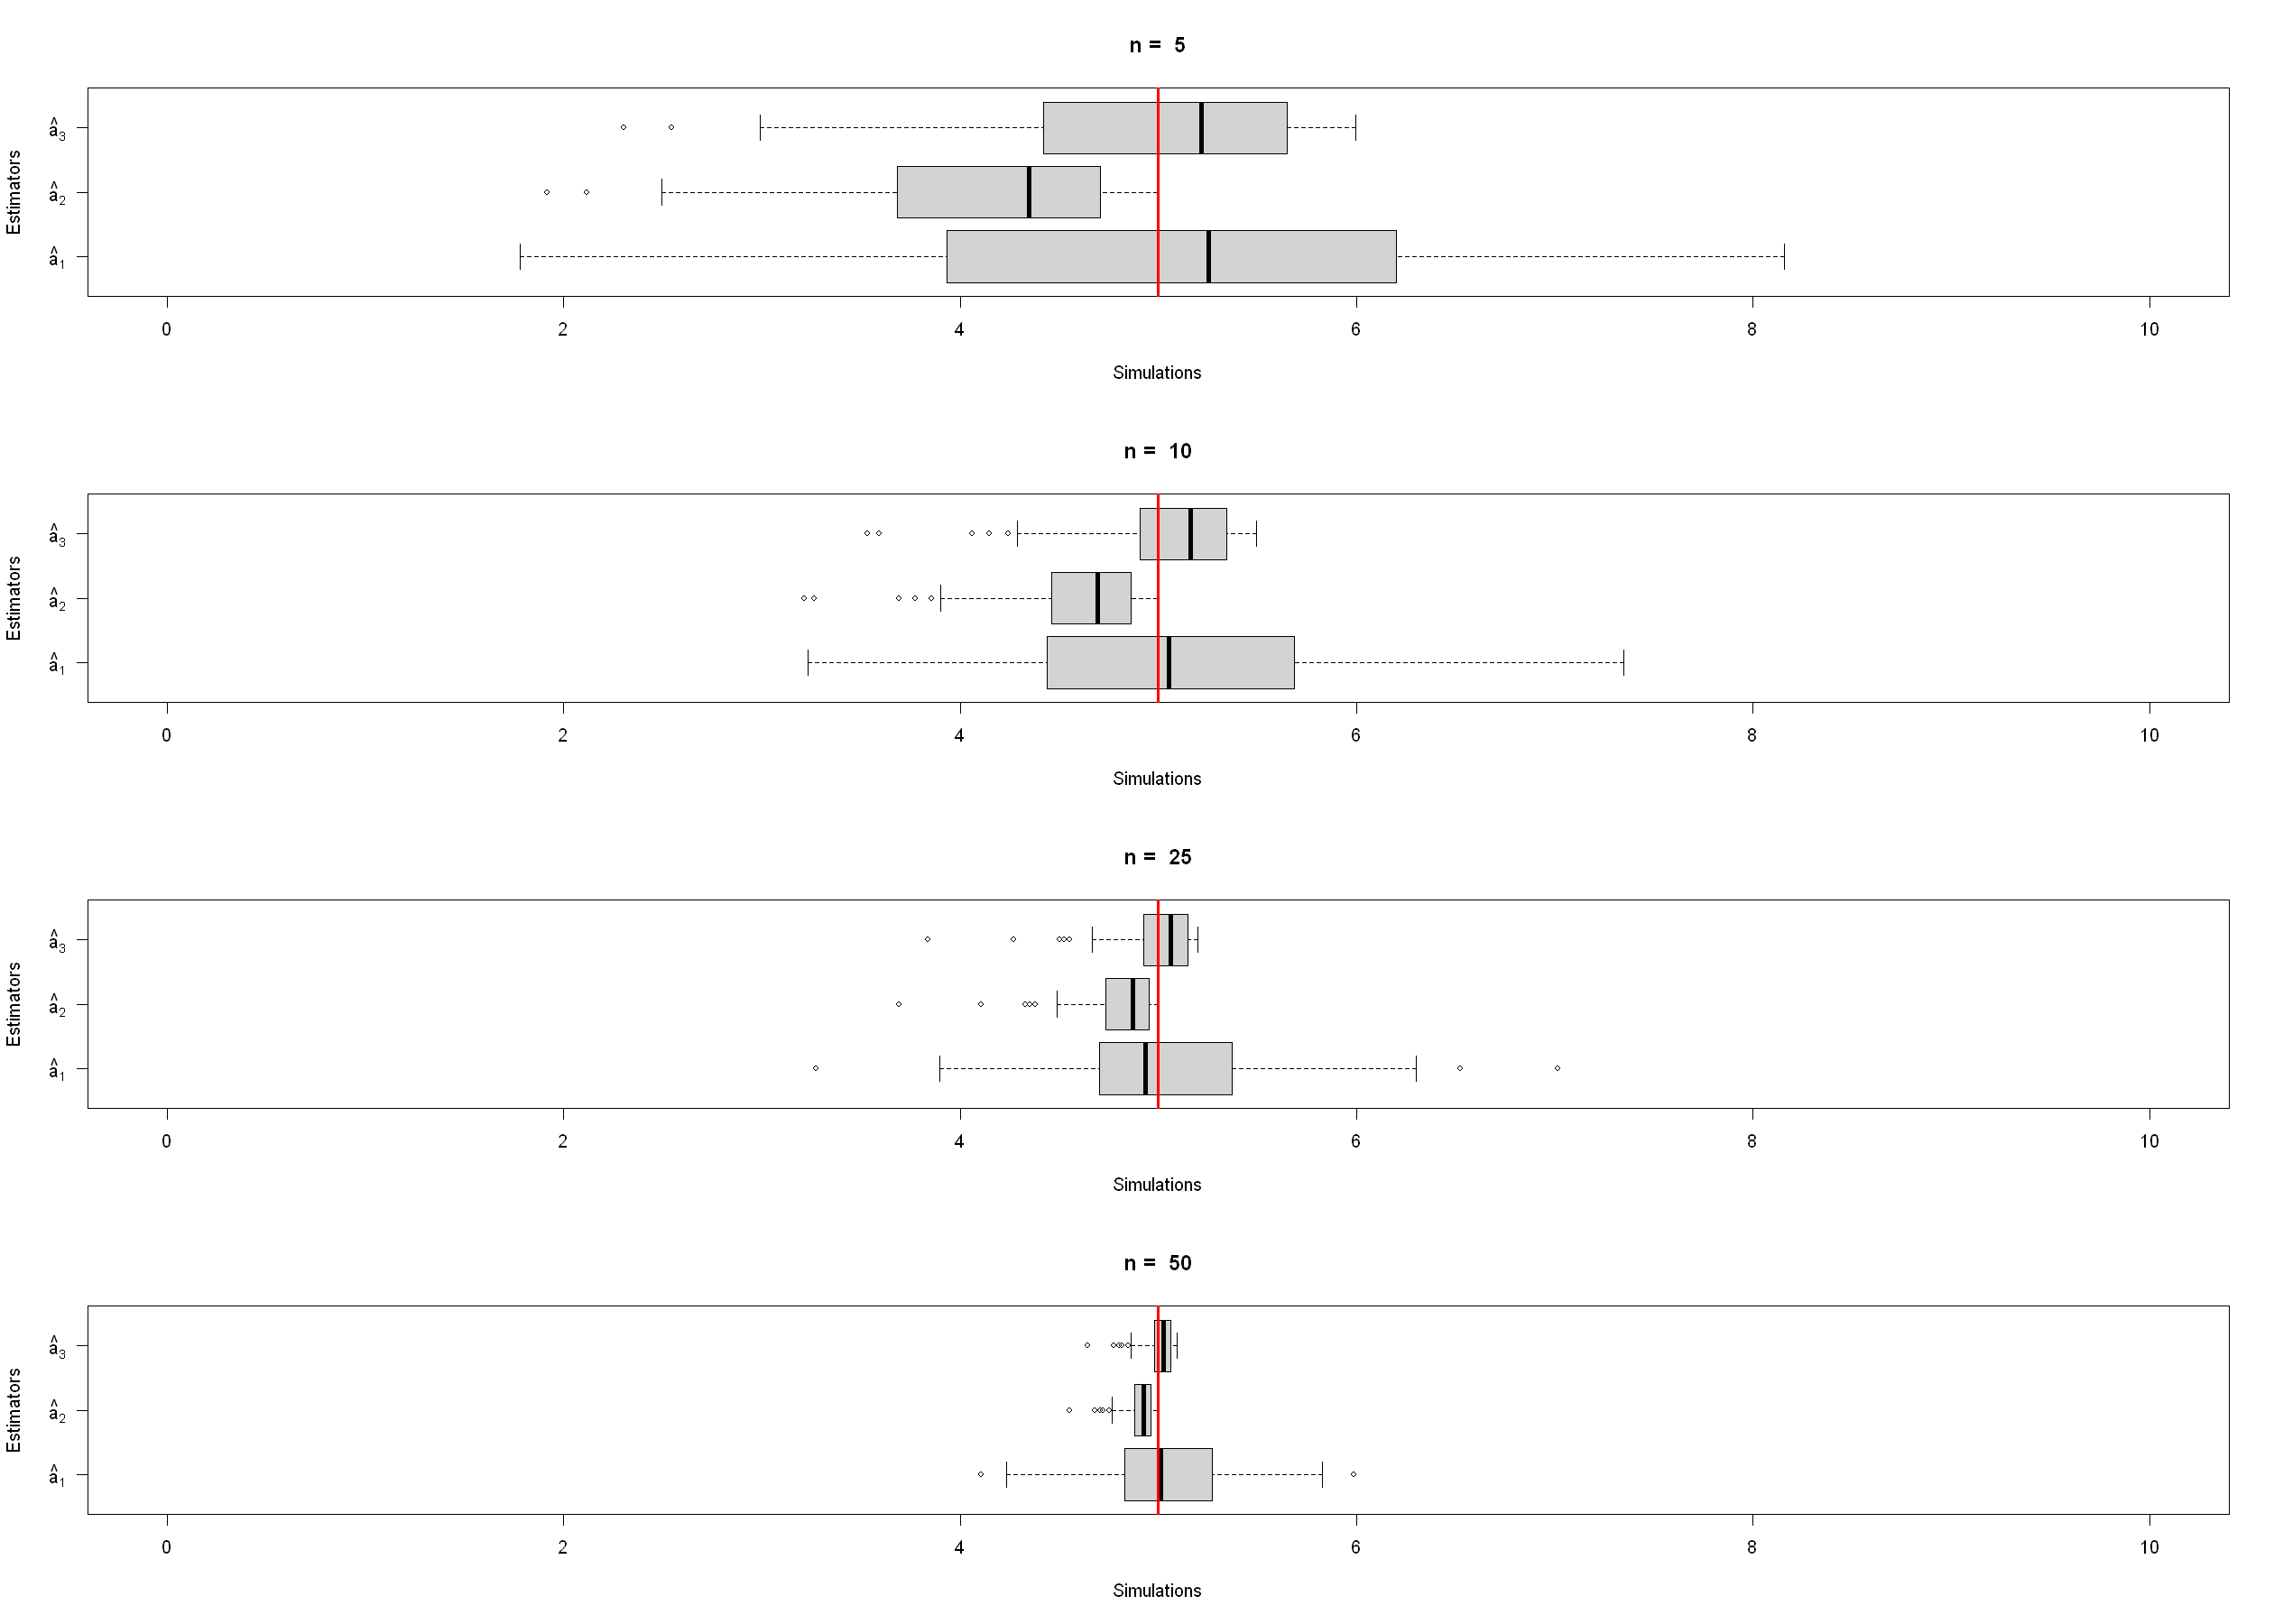

In [26]:
K <- 100
par(mfrow=c(4,1))

for (n in seq.n) {
    h.simul <- hist(emp.distrib.a1hat(a,n),plot=FALSE)
    x.lim <- c(0,10)
    y.lim <- c(0,max(c(n/a,sqrt((3*n)/(2*pi))/a,n^2/((n+1)*a),max(h.simul$density))))
    sample <- matrix(runif(n*K,min=0,max=a),ncol=n)
    a1hat <- 2*rowMeans(sample)
    a2hat <- apply(sample,MARGIN=1,FUN=max)
    a3hat <- (n+1)*a2hat/n
    simul <- c(a1hat,a2hat,a3hat)
    boxplot(simul~rep(1:3,each=K),
            xlab="Simulations",
            ylab="Estimators",
            ylim=x.lim,
            horizontal=TRUE, 
            main=paste("n = ",n),
            names=c(expression(hat(a)[1]),expression(hat(a)[2]),expression(hat(a)[3])),
            las=1)
abline(v=a,col="red",lwd=2)
}

> - Computing the **MSE** of each estimator depending on $n$.

In [27]:
N <- 2:40 
MSE1 <- (a^2)/(3*N)
MSE2 <- (((N*a)/(N+1)-a)^2)+ (N*a^2)/((N+2)*(N+1)^2)
MSE3 <- (a^2)/((N+2)*N)

> - Plotting the **MSE** of each estimator depending on $n$.

In [28]:
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res = 160)

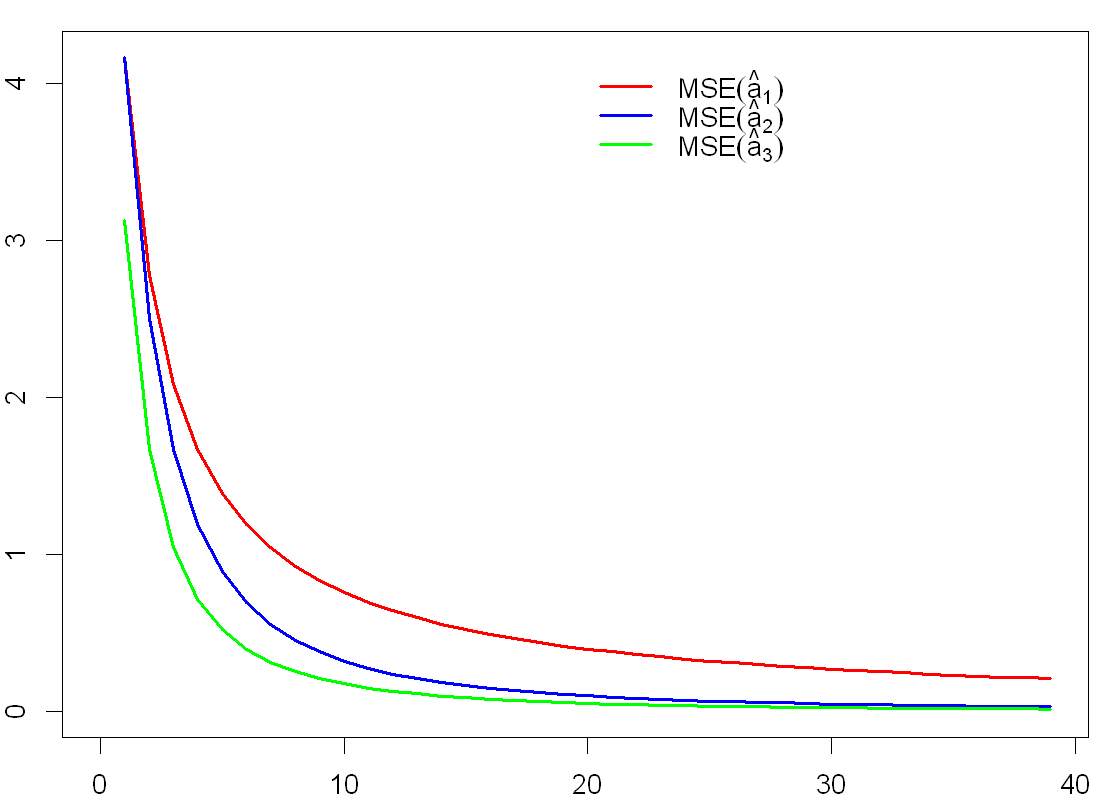

In [29]:
par(mar=c(2,2,1,1))
col <- c("red","blue","green")
y.lim <- max(c(MSE1,MSE2,MSE3))

plot(0,0,"n",
     xlim=c(0,length(N)),
     ylim=c(0,y.lim),
     xlab="N",
     ylab="Estimators value")

points(1:length(N),MSE1,type="l",col=col[1],lwd=2)
points(1:length(N),MSE2,type="l", col=col[2],lwd=2)
points(1:length(N),MSE3,type="l", col=col[3],lwd=2)

legend(length(N)/2,
       y.lim,
       lty=1,
       lwd=2,
       legend=c(expression(MSE(hat(a)[1])),
                expression(MSE(hat(a)[2])),
                expression(MSE(hat(a)[3]))),
       bty="n",
       col=col)

***
## Central limit theorem
> **$Theorem:$** If $X_1,X_2,...,X_n$ are random samples drawn from a population of mean $\mu$ and variance $\sigma^2$ with $\bar X_n$ being the sample mean then the sequence $U_n = \frac{\hat m - m}{\sigma /\sqrt{n}}$ converge in distribution towards $N(0,1)$.
> ***
> ### CLT and Binomial distribution
> - Parameters $p = 7$.

In [30]:
p <- 0.7

In [37]:
binomial.sample.plot <- function(n){
    
    # Parameters
    m.bino <- n*p
    sigma2.bino <- n*p*(1-p)
    
    # Bounds
    x.inf <- floor(m.bino - 6*sqrt(sigma2.bino))
    x.sup <- floor(m.bino + 6*sqrt(sigma2.bino))
    x.bino <- x.inf:x.sup
    x.norm <- seq(from=x.inf,to=x.sup,length=1000)
    
    # Distributions
    bino.dist <- dbinom(x=x.bino,size=n,prob=p)
    norm.dist <- dnorm(x=x.norm,mean=m.bino,sd=sqrt(sigma2.bino))
    ylim <- c(0,max(bino.dist,norm.dist)*1.1)
    
    # PLots
    plot(x.bino,bino.dist,ylim=ylim,type="h",col="blue",lwd=2,main=paste("n = ",n),ylab="",xlab="")
    lines(x.norm,norm.dist,type="l",col="red",lwd=2,xaxt="n")
    axis(side=1, at=x.bino, labels=x.bino)   
}

In [35]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 180)

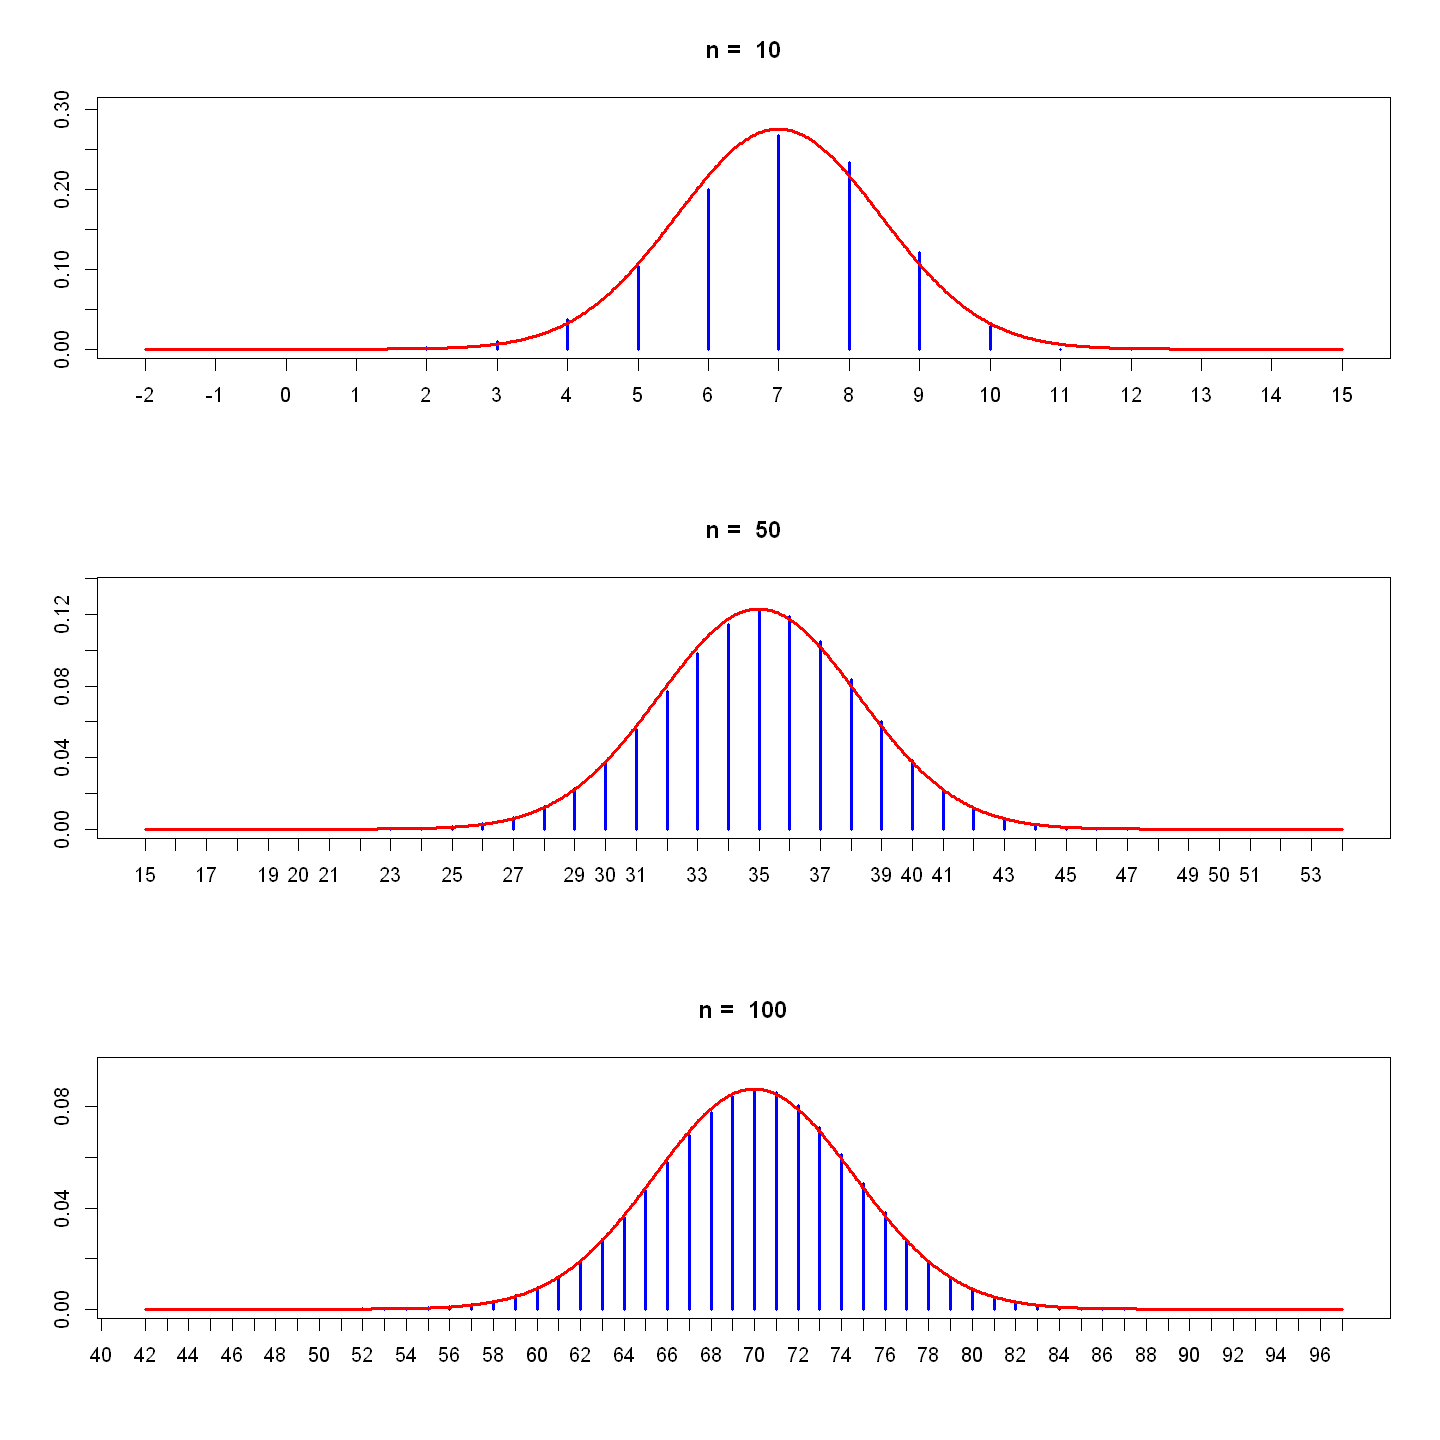

In [38]:
par(mfrow=c(3,1))

for (n in c(10,50,100)) { 
    binomial.sample.plot(n)
}

In [137]:
p.approx <- function(n,p){
    
    q <- floor(n*p + sqrt(n*p*(1-p)))
    
    # Binomial computation of p
    p.bino <- pbinom(q,n,p)
    
    # Normal approximation of Binomial Distribution
    p.norm <- pnorm(q,n*p,sqrt(n*p*(1-p))) 
    
    # Yates continuity correction
    p.norm.yates <- pnorm(q+0.5,n*p,sqrt(n*p*(1-p)))
    
    # plots
    barplot(c(p.bino,p.norm,p.norm.yates),main=paste("n = ",n, " p = ", p),ylim=c(0,1))
    abline(h=p.bino,col="red",lwd=2)
    
    #approx[nrow(approx)+1,] = list(P.Binom=p.bino,P.Norm=p.norm,P.Norm.Yates=p.norm.yates)
    #approx <- rbind(approx,data.frame(P.Binom=p.bino,P.Norm=p.norm,P.Norm.Yates=p.norm.yates))
    #cat("P.Binom:",p.bino,"P.Norm:",p.norm,"P.Norm.Yates",p.norm.yates)
}

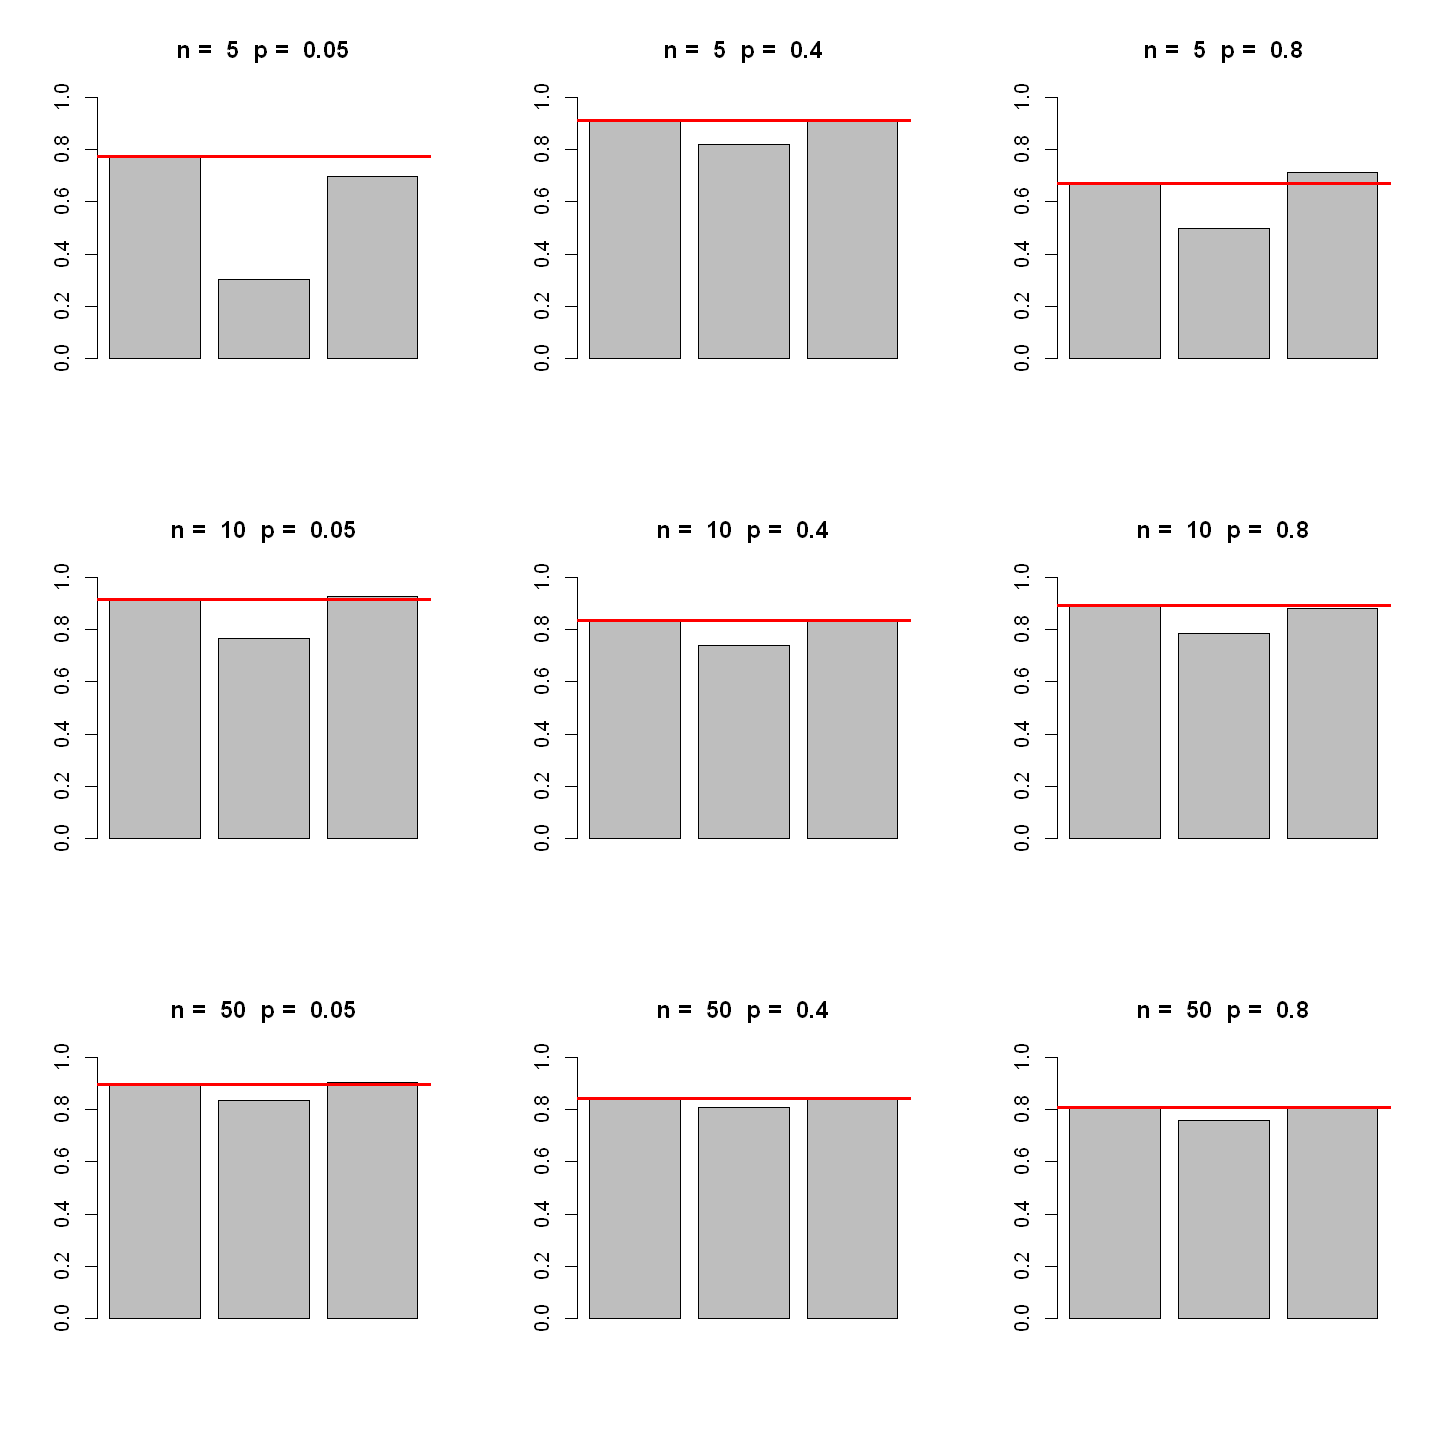

In [140]:
par(mfrow=c(3,3))

for (n in c(5,10,50)) {
    for (p in c(0.05,0.4,0.8)){p.approx(n,p)}
}

***
## Confidence Interval
> ### $B(n,p)$ distribution
> - Computation of confidence intervals on $p$ under **Normal** approximation.

In [29]:
IC.Bino <- function(p,n,p.est,niv.conf) {
    u <- qnorm(1 - (1-niv.conf)/2, mean = 0, sd = 1)
    return(abs(p.est-p) - u*sqrt((p*(1-p))/n))
}

IC.Bino2 <- function(p,n,p.est,niv.conf) {
    u <- qnorm(1 - (1-niv.conf)/2, mean = 0, sd = 1)
    return(abs(p.est-p) - 0.5/n - u*sqrt((p*(1-p))/n))
}

> - Analysis of different confidence **interval calculations**.
> - Confidence interval parameters.

In [30]:
accuracy.res <- 5
n <- 20
p.conf <- 0.95
p <- 0.2

> - Computation of the $p$ estimator.

In [31]:
x0 <- rbinom(1,n,p)
p.hat <- x0/n 

> - Computation of assymptotic interval bounds.

In [32]:
p.min.asympt <- uniroot(IC.Bino,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(0,p.hat))$root
p.max.asympt <- uniroot(IC.Bino,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(p.hat,1))$root

> - Computation of assymptotic interval bounds with continuity correction.

In [33]:
p.min.asympt.cont.corr <- uniroot(IC.Bino2,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(0,p.hat))$root
p.max.asympt.cont.corr <- uniroot(IC.Bino2,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(p.hat,1))$root

> - Computation of the quantil  $u_{1-\alpha/2}$.

In [34]:
u <- qnorm(1 - (1-p.conf)/2)

> - Computation of the Wald interval bounds by proportion approximation.

In [35]:
p.min.approx <- p.hat - u*sqrt(p.hat*(1-p.hat)/n) 
p.max.approx <- p.hat + u*sqrt(p.hat*(1-p.hat)/n)

> - Printing the different intervals for comparison.

In [36]:
cat("Assymptotic interval formula without continuity correction at level", p.conf,":     [",round(c(p.min.asympt,p.max.asympt),digits=accuracy.res),"]")
cat("\nAssymptotic interval formula with continuity correction at level", p.conf,":        [",round(c(p.min.asympt.cont.corr,p.max.asympt.cont.corr),digits=accuracy.res),"]")
cat("\nInterval from function binom.test without normal approximation at level", p.conf,": [",round(binom.test(x0,n,conf.level=p.conf)$conf,digits=accuracy.res),"]")
cat("\nInterval from function prop.test at level", p.conf,":\t\t\t       [",round(prop.test(x0,n,conf.level=p.conf,correct=FALSE)$conf,digits=accuracy.res),"]")
cat("\nInterval from function prop.test with continuity correction at level", p.conf,":    [",round(prop.test(x0,n,conf.level=p.conf,correct=TRUE)$conf,digits=accuracy.res),"]")
cat("\nWald interval proportion approximation at level", p.conf,":\t\t\t       [",round(c(p.min.approx,p.max.approx),digits=accuracy.res),"]")

Assymptotic interval formula without continuity correction at level 0.95 :     [ 0.08064 0.41602 ]
Assymptotic interval formula with continuity correction at level 0.95 :        [ 0.06611 0.44269 ]
Interval from function binom.test without normal approximation at level 0.95 : [ 0.05733 0.43661 ]
Interval from function prop.test at level 0.95 :			       [ 0.08066 0.41602 ]
Interval from function prop.test with continuity correction at level 0.95 :    [ 0.06611 0.44269 ]
Wald interval proportion approximation at level 0.95 :			       [ 0.0247 0.3753 ]

> - Graphical representation of intervals computed using the **prop.test()** function under gaussian approximation.

In [37]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 150)

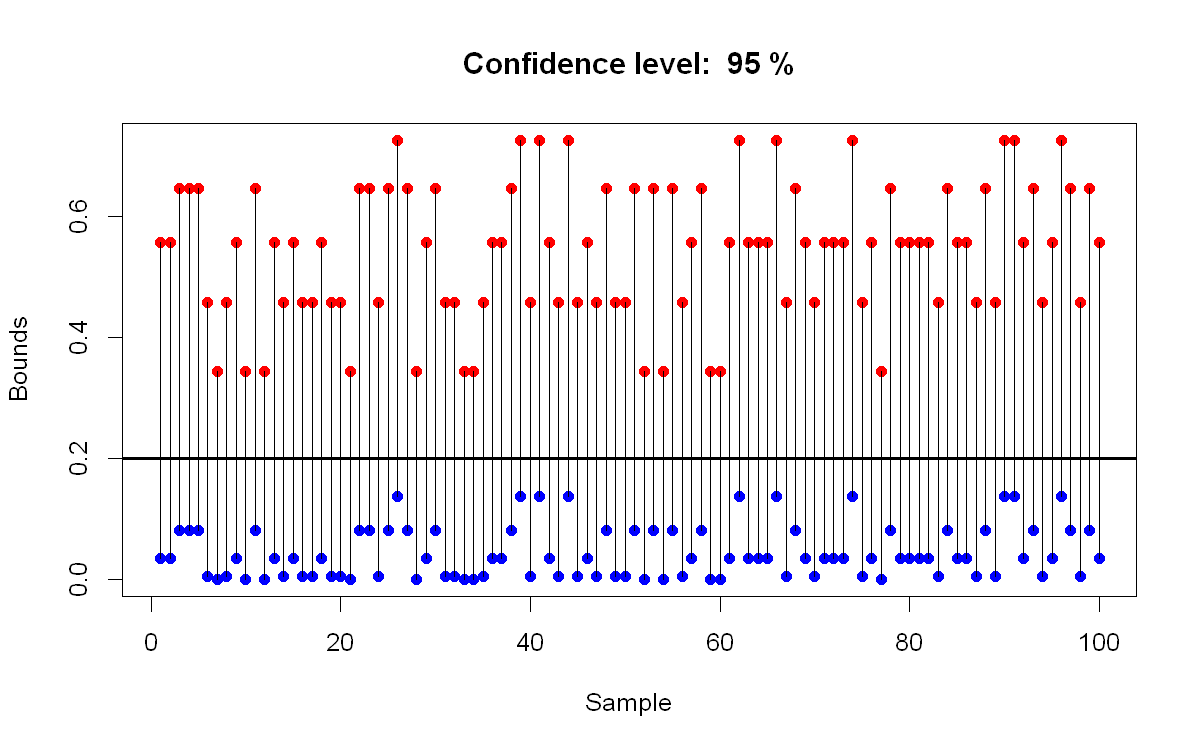

In [38]:
K <- 100
n <- 10
X <- rbinom(K,n,p)

bounds <- NULL
for (k in 1:K) { bounds <- rbind(bounds,prop.test(X[k],n,conf.level=p.conf)$conf) }

ymin <- min(bounds)
ymax <- max(bounds)

plot(1:K,bounds[,1],pch=19,col="blue",ylim=c(ymin,ymax),xlab="Sample",ylab="Bounds")
points(1:K,bounds[,2],pch=19,col="red")
segments(1:K,bounds[,1],1:K,bounds[,2])
title(paste("Confidence level: ",100*p.conf,"%"))
abline(h=p,lwd=2)

> - Analysis of the sample size needed for diffrent accuracy measured $(p - \hat p)$ of different confidence intervals on $p$
> - Parameters.

In [39]:
p<-seq(0.01,0.5,by=0.01)
p.conf<-0.95
accuracy.inter1<-0.01
accuracy.inter2<-0.02
accuracy.inter3<-0.03
accuracy.inter4<-0.04
p.conf.bil<-1-(1-p.conf)/2
u<-qnorm(p.conf.bil)
N1<-NULL                
N2<-NULL
N3<-NULL
N4<-NULL

> - Computation of the required sample size $n$ for each probability for each required accuracy.

In [40]:
for (k in 1:length(p)) {
    N1<-c(N1,u^2*p[k]*(1-p[k])/(accuracy.inter1^2))
    N2<-c(N2,u^2*p[k]*(1-p[k])/(accuracy.inter2^2))
    N3<-c(N3,u^2*p[k]*(1-p[k])/(accuracy.inter3^2))
    N4<-c(N4,u^2*p[k]*(1-p[k])/(accuracy.inter4^2))
}

> - Plotting the difference.

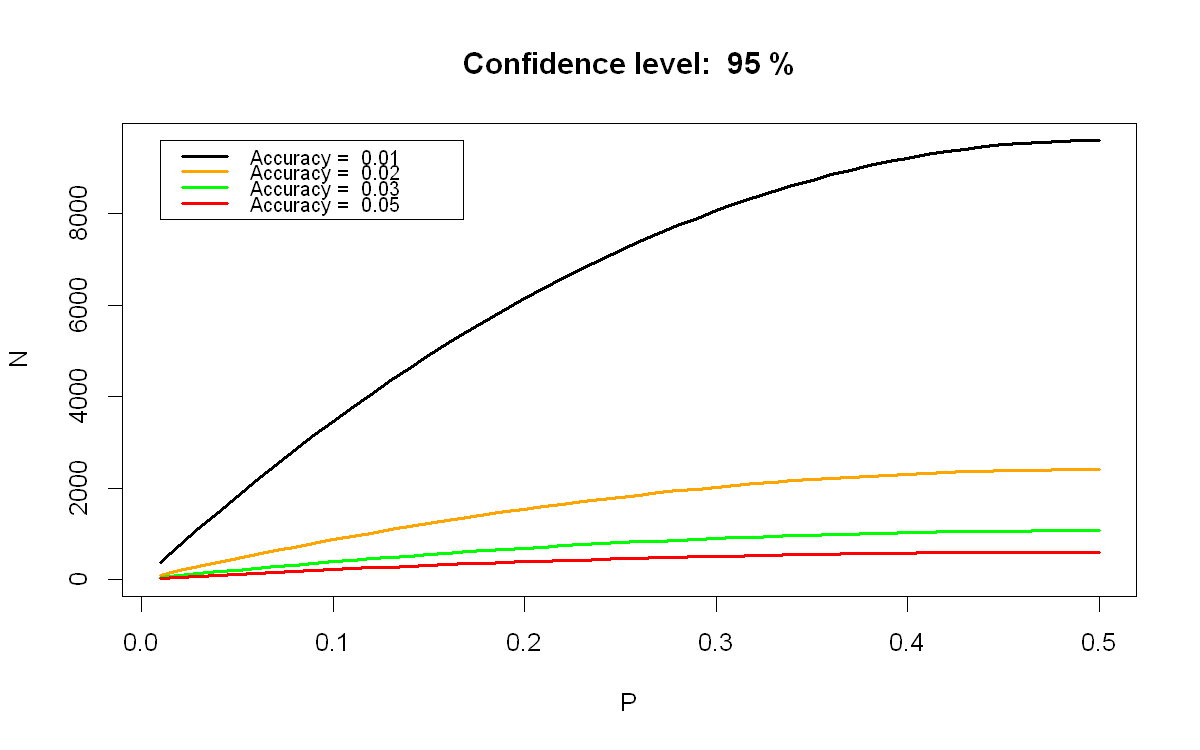

In [41]:
col<-c("black","orange","green","red")
plot(p,floor(N1),type="l",lwd=2,xlab="P",ylab="N",ylim=c(0,max(N1)))
lines(p,floor(N2),type="l",lwd=2,col=col[2])
lines(p,floor(N3),type="l",lwd=2,col=col[3])
lines(p,floor(N4),type="l",lwd=2,col=col[4])
title(paste("Confidence level: ",100*p.conf,"%"))
legend(min(p),max(N1),cex=0.8, lty=1,lwd=2,legend=paste("Accuracy = ",c(0.01,0.02,0.03,0.05)),col=col)

> ***
> ### Gaussian distribution
> - Parameters.

In [42]:
K <- 100
n <- 10
digits <- 5
m <- 2
sigma2 <- 1.5
sigma <- sqrt(sigma2)
p.conf <- 0.9
p.conf.bil <- 1-(1-p.conf)/2

> - **Exact** interval computation.

In [43]:
x <- rnorm(n=n,mean=m,sd=sigma)
l.inf.m <- mean(x) + qt(1 - p.conf.bil,df=n-1) * sqrt(var(x)/n)
l.sup.m <- mean(x) + qt(p.conf.bil,df=n-1) * sqrt(var(x)/n)

> - **Bootstrap** interval computation.

In [44]:
bootstrap <- NULL
for (k in 1:K) { bootstrap <- rbind(bootstrap,sample(x,n,replace=TRUE)) }
L.quantiles <- quantile(apply(bootstrap,MARGIN=1,FUN=mean),probs=c((1-p.conf)/2 , 1-(1-p.conf)/2))

In [45]:
cat("For m = ",m,"at confidence level:", p.conf,"and n = ", n, ":\n\nExact interval on m :      ",round(c(l.inf.m, l.sup.m),digits=digits),"\nBootstraped interval on m :",round(L.quantiles,digits=digits))

For m =  2 at confidence level: 0.9 and n =  10 :

Exact interval on m :       1.41029 2.32279 
Bootstraped interval on m : 1.52813 2.27864

***
## Hypothesis Testing
> The aim here is to use graphical representation oh hypothesis testing to understand the effect implied by variations in values of *n* and $\alpha$.
> - Parameters.

In [46]:
sigma <- 7
m0 <- 80
m1 <- 78

> - Function coloring both errors of the hypothesis testing depending on $\alpha$ and $n$.

In [47]:
graphical.errors <- function(alpha, n){

#Computation
threshold <- m0+(sigma/sqrt(n))*qnorm(alpha, mean = 0, sd = 1)
beta <- 1-pnorm((sqrt(n)/sigma)*(threshold-m1), mean = 0, sd = 1)

#Plot Lines
x.H0 <- seq(m0-3.5*sigma/sqrt(n), m0+3.5*sigma/sqrt(n), length=500)
x.H1 <- seq(m1-3.5*sigma/sqrt(n), m1+3.5*sigma/sqrt(n), length=500)
x.H0.H1 <- c(x.H0,x.H1)
plot(x.H0, dnorm(x.H0,m0,sigma/sqrt(n)), type = "l", main = "", xlim=c(min(x.H0.H1),max(x.H0.H1)) , sub = "", xlab = "", ylab = "")
lines(x.H1, dnorm(x.H1,m1,sigma/sqrt(n)), type = "l" , xlab = "", ylab = "")

#Separate outcomes
abline(h=0)
abline(v=threshold,lwd=2)

#Color Alpha
x.alpha <- seq(min(x.H0),threshold,length=500)
y.alpha <- c(rep(0,length(x.alpha)),rev(dnorm(x.alpha,m0,sigma/sqrt(n))))
x.alpha <- c(x.alpha,rev(x.alpha))
polygon(x.alpha, y.alpha, col = "red")

#Color Beta
x.beta <- seq(threshold,max(x.H1),length=500)
y.beta <- c(rep(0,length(x.beta)),rev(dnorm(x.beta,m1,sigma/sqrt(n))))
x.beta <- c(x.beta,rev(x.beta))
polygon(x.beta, y.beta, col = "yellow")

#Plot Titles
mtext("Alpha : Red  /  Beta : Yellow", side = 3, line = -1.8, outer = TRUE)
title(paste("\nn =",n," Alpha =",alpha))
}

> - Plotting the result by changing respectively values of $\alpha$ and $n$.

In [48]:
options(repr.plot.width=10, repr.plot.height=6, repr.plot.res = 200)

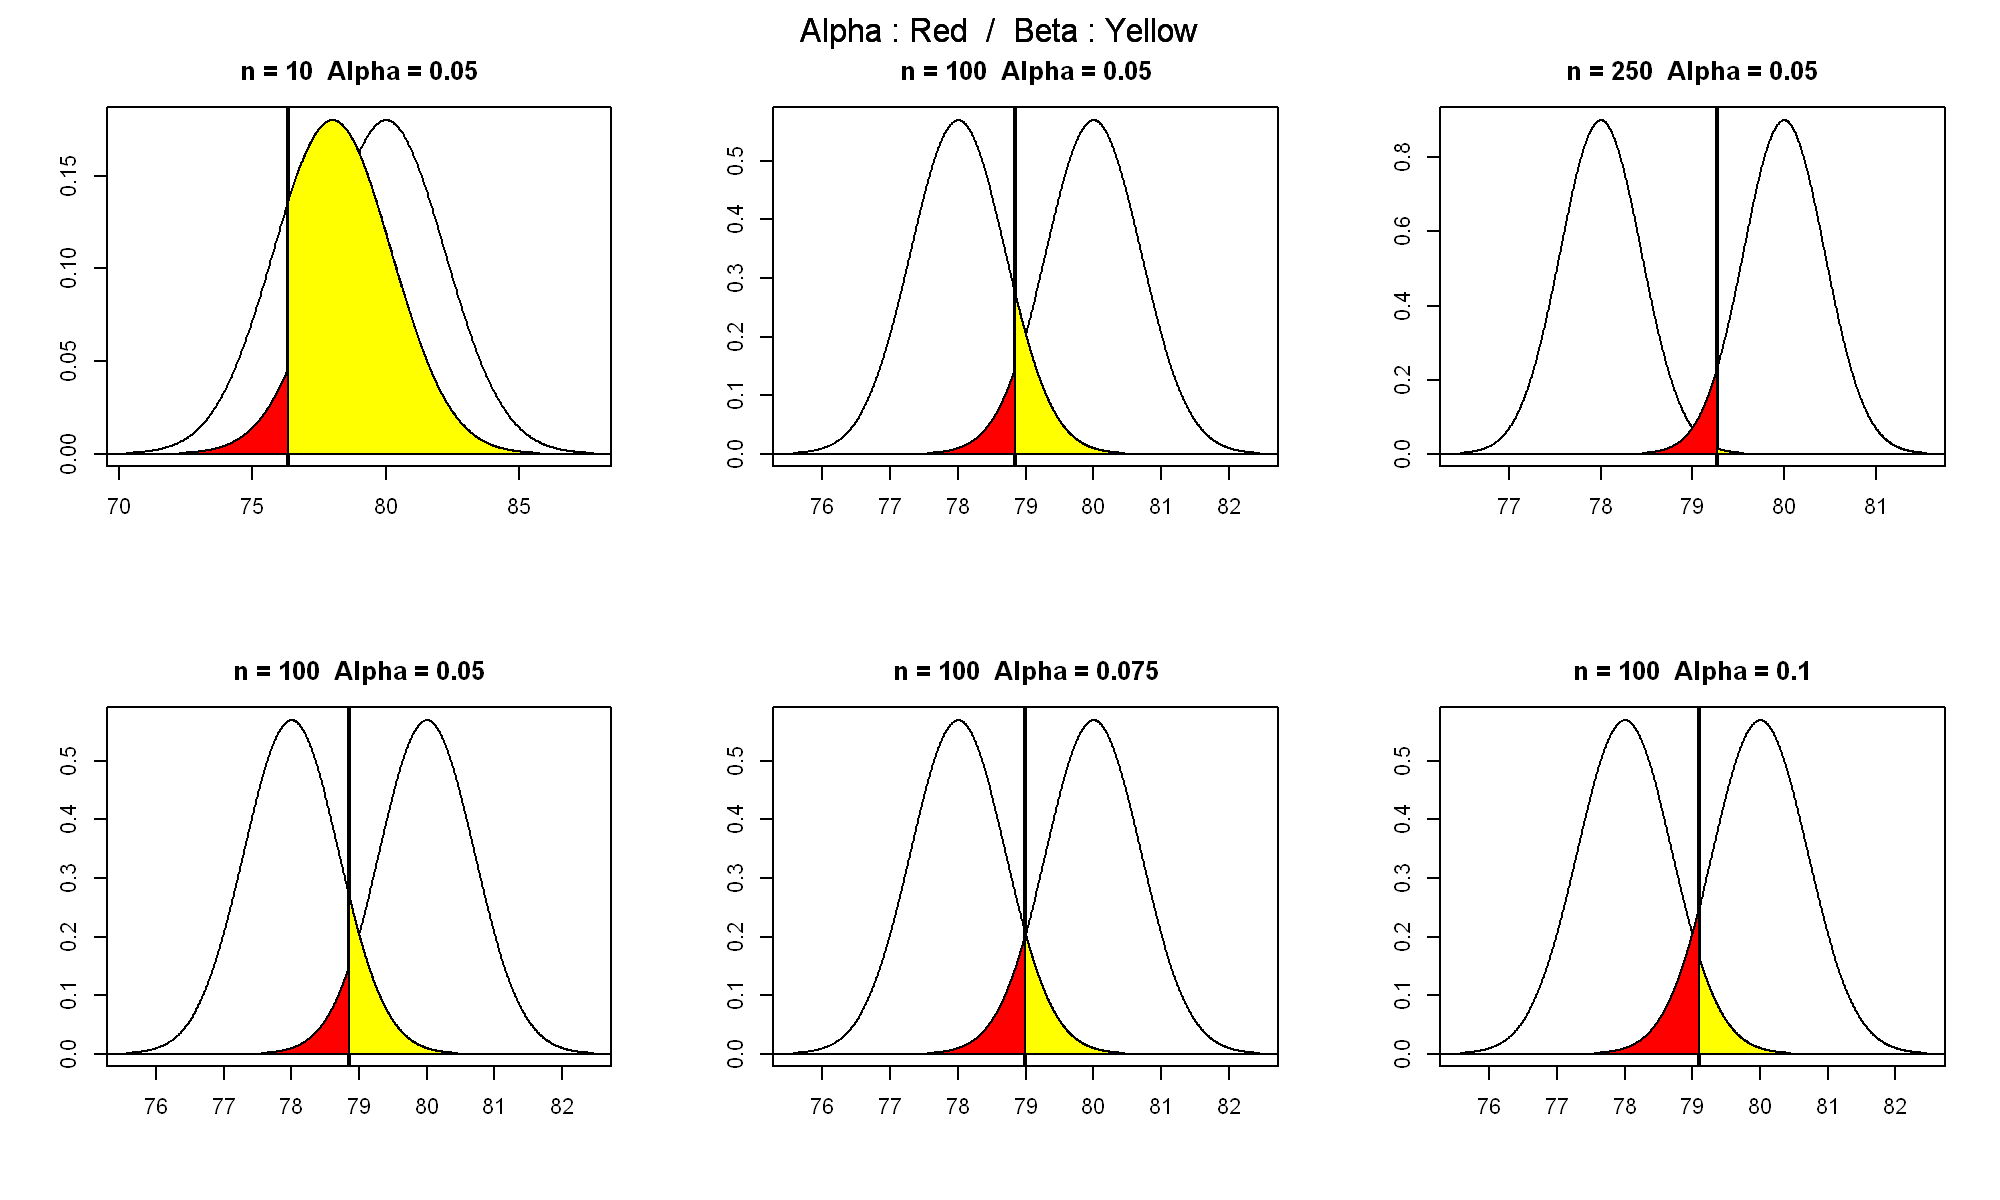

In [49]:
par(mfrow=c(2,3))

seq.n <- c(10, 100, 250)
seq.alpha <- c(0.05, 0.075, 0.1)
for(n in seq.n) {graphical.errors(0.05, n)}
for(alpha in seq.alpha) {graphical.errors(alpha, 100)}

> - Set parameters.

In [50]:
K <- 500
n <- 100
alpha <- 0.05

> - Compute alternate hypothesis acceptance threshold.

In [51]:
threshold <- m0+(sigma/sqrt(n))*qnorm(alpha, mean = 0, sd = 1)

> - ***freq.d1*** represents the frequency of the samples of size n for which the estimation of the mean allowed us to accept H1.

In [52]:
freq.d1<-FALSE
for(k in 1:K) { freq.d1 <- freq.d1 + (mean(rnorm(n,m0,sigma)) < threshold) }
freq.d1/K

[1] 0.068

> - Function plotting the curve of power $(1-\beta)$ for samples of different size $n$ for a given $\alpha$.

In [53]:
plot.alpha <- function(alpha, col){

#First sample size
n=10

#Computation
m.H1 <- seq(m0-2*sigma,m0,length=500)
threshold <- m0 - qnorm(1-alpha)*sigma/sqrt(n)
puissance <-pnorm((sqrt(n)/sigma)*(threshold-m.H1), mean = 0, sd = 1)

#Plots
plot(m.H1,
     puissance,
     type="l",
     main=paste("alpha = ", alpha),
     xlim=c(min(m.H1),max(m.H1)+1),
     ylim=c(min(puissance),1),
     sub ="", 
     xlab="H1", 
     ylab=expression(1-beta), 
     lwd =2, 
     col =col[1])

i <- 1
for(n in c(25,50,100,150)) {
    i <- i + 1
    threshold <- m0 - qnorm(1-alpha)*sigma/sqrt(n)
    puissance <- pnorm(threshold,m.H1,sigma/sqrt(n))
    lines(m.H1, puissance, type = "l", lwd = 2, col=col[i])
    legend(min(m.H1),
           0.9,
           cex=1,
           lty=1,
           lwd=2,
           bty='n',
           legend=paste("n = ",
                        c(10,25,50,100,150)),
           col=col)
    }
}

> - Plotting the power curves for different values of $\alpha$.

In [54]:
options(repr.plot.width=12, repr.plot.height=8, repr.plot.res = 180)

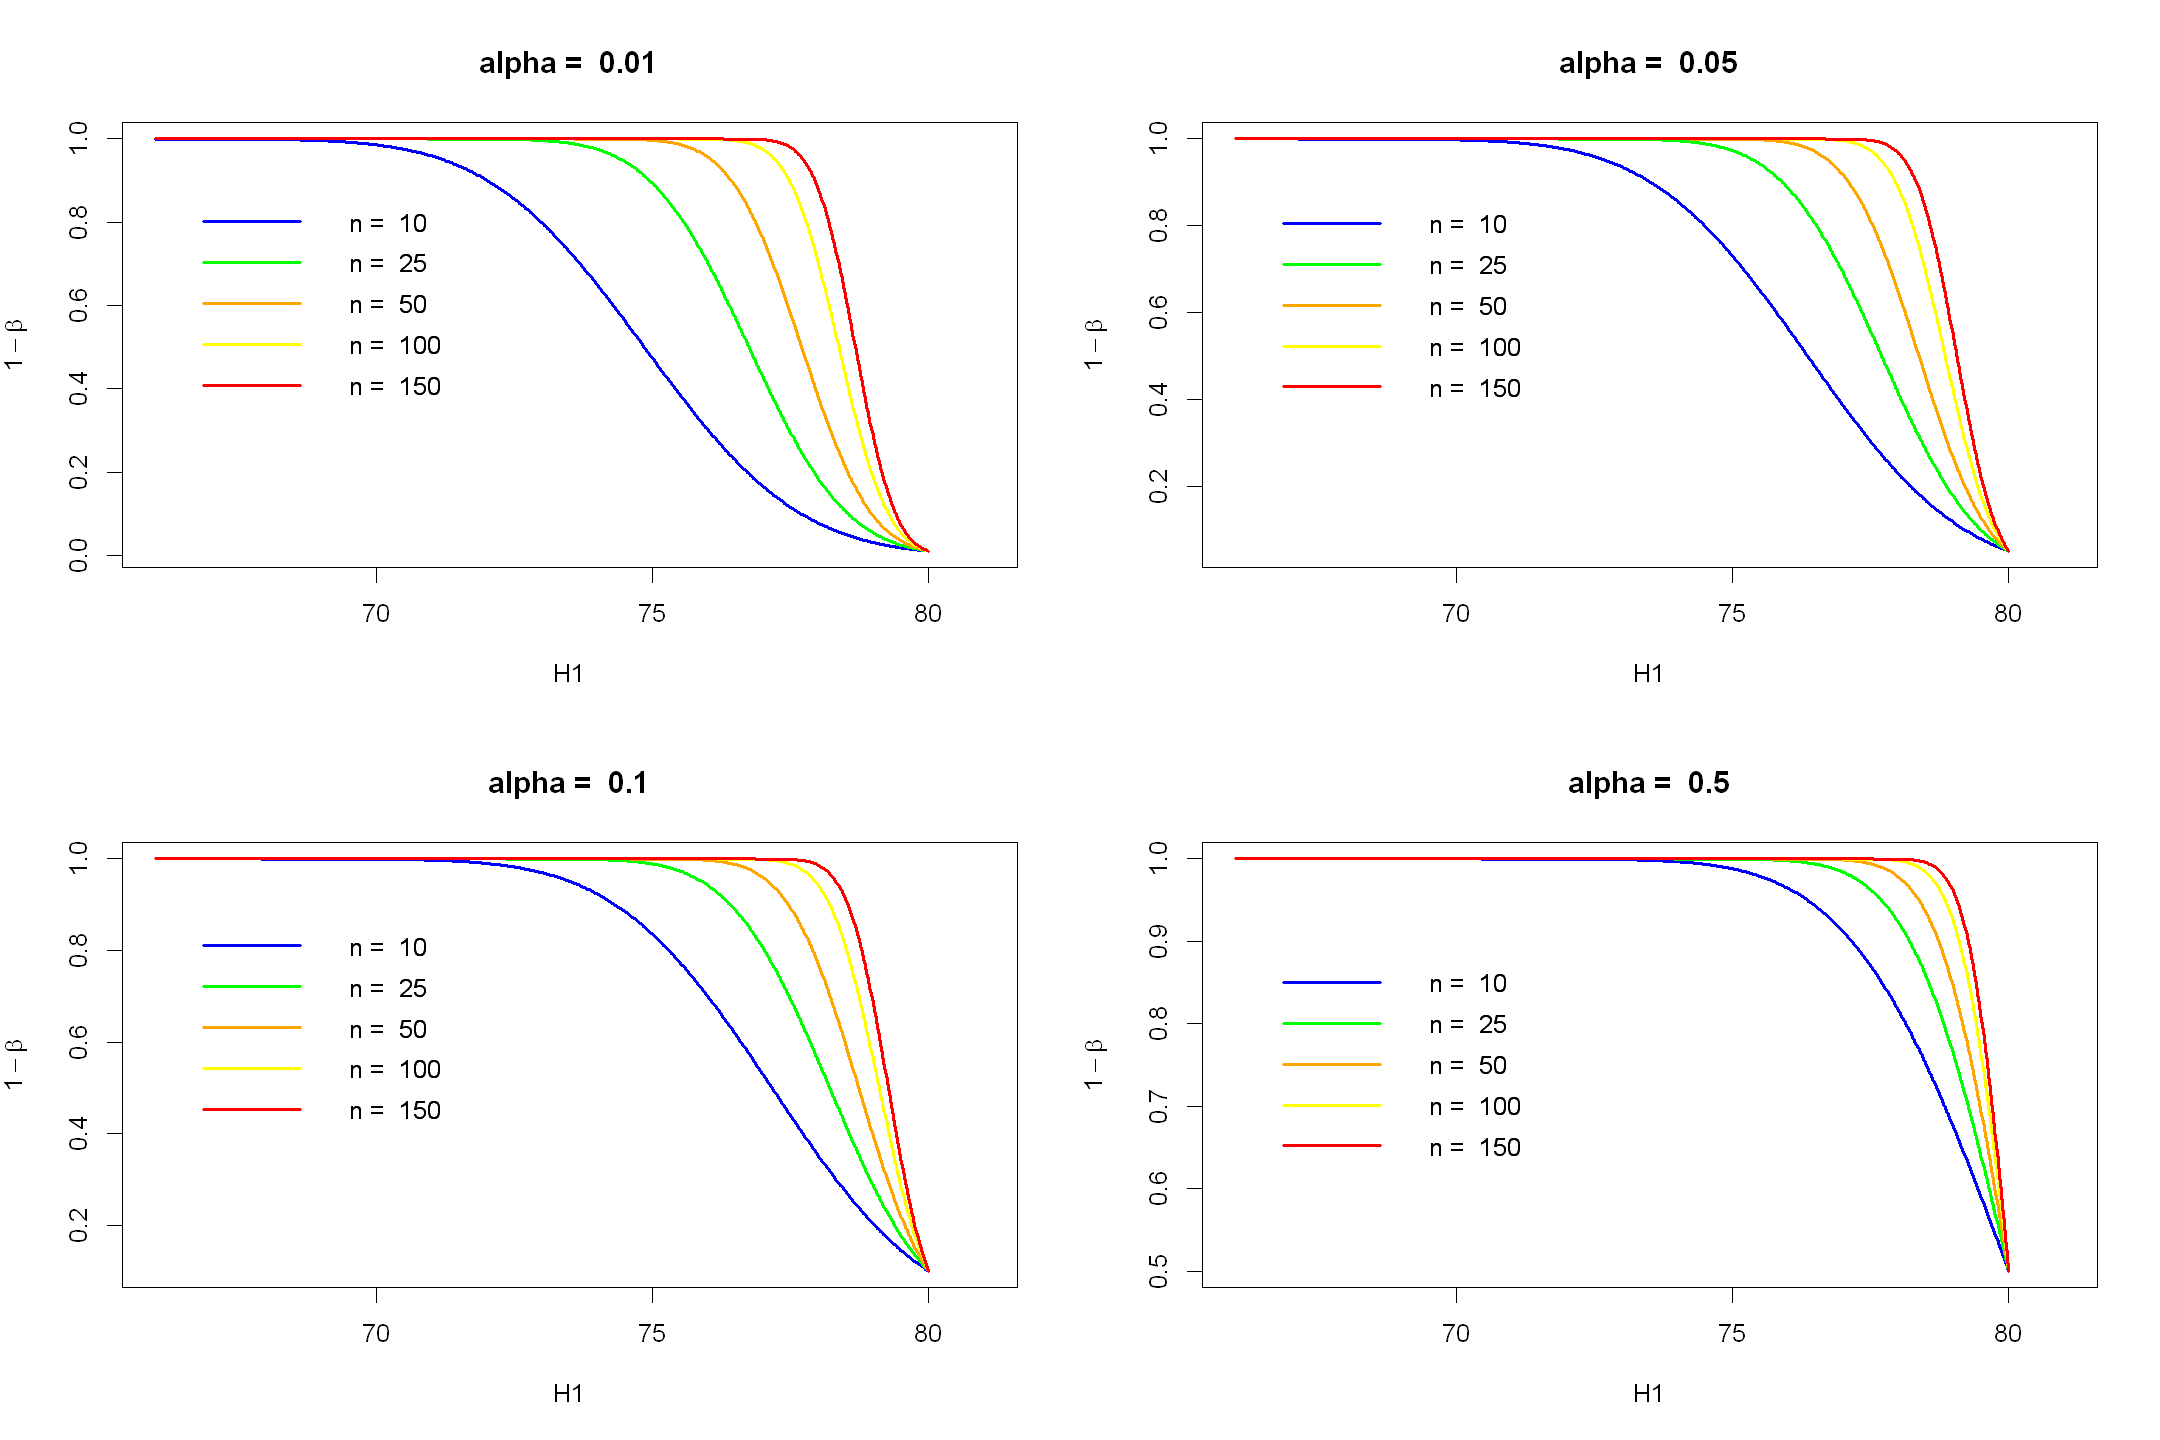

In [55]:
par(mfrow=c(2,2))

col <- c("blue","green","orange","yellow","red")
seq.alpha <- c(0.01, 0.05, 0.1, 0.5)
for(alpha in seq.alpha) {plot.alpha(alpha, col)}

## TP FINAL

[1] 0.4 0.4 0.4 0.6 0.8 0.5 0.4 0.3 0.3 0.5

[1] 0.46

[1] 0.3 0.4 0.4 0.3 0.5 0.4 0.5 0.9 0.7 0.8 0.6 0.3 0.4 0.7 0.6 0.5 0.3 0.6 0.6
[20] 0.4

[1] 0.51

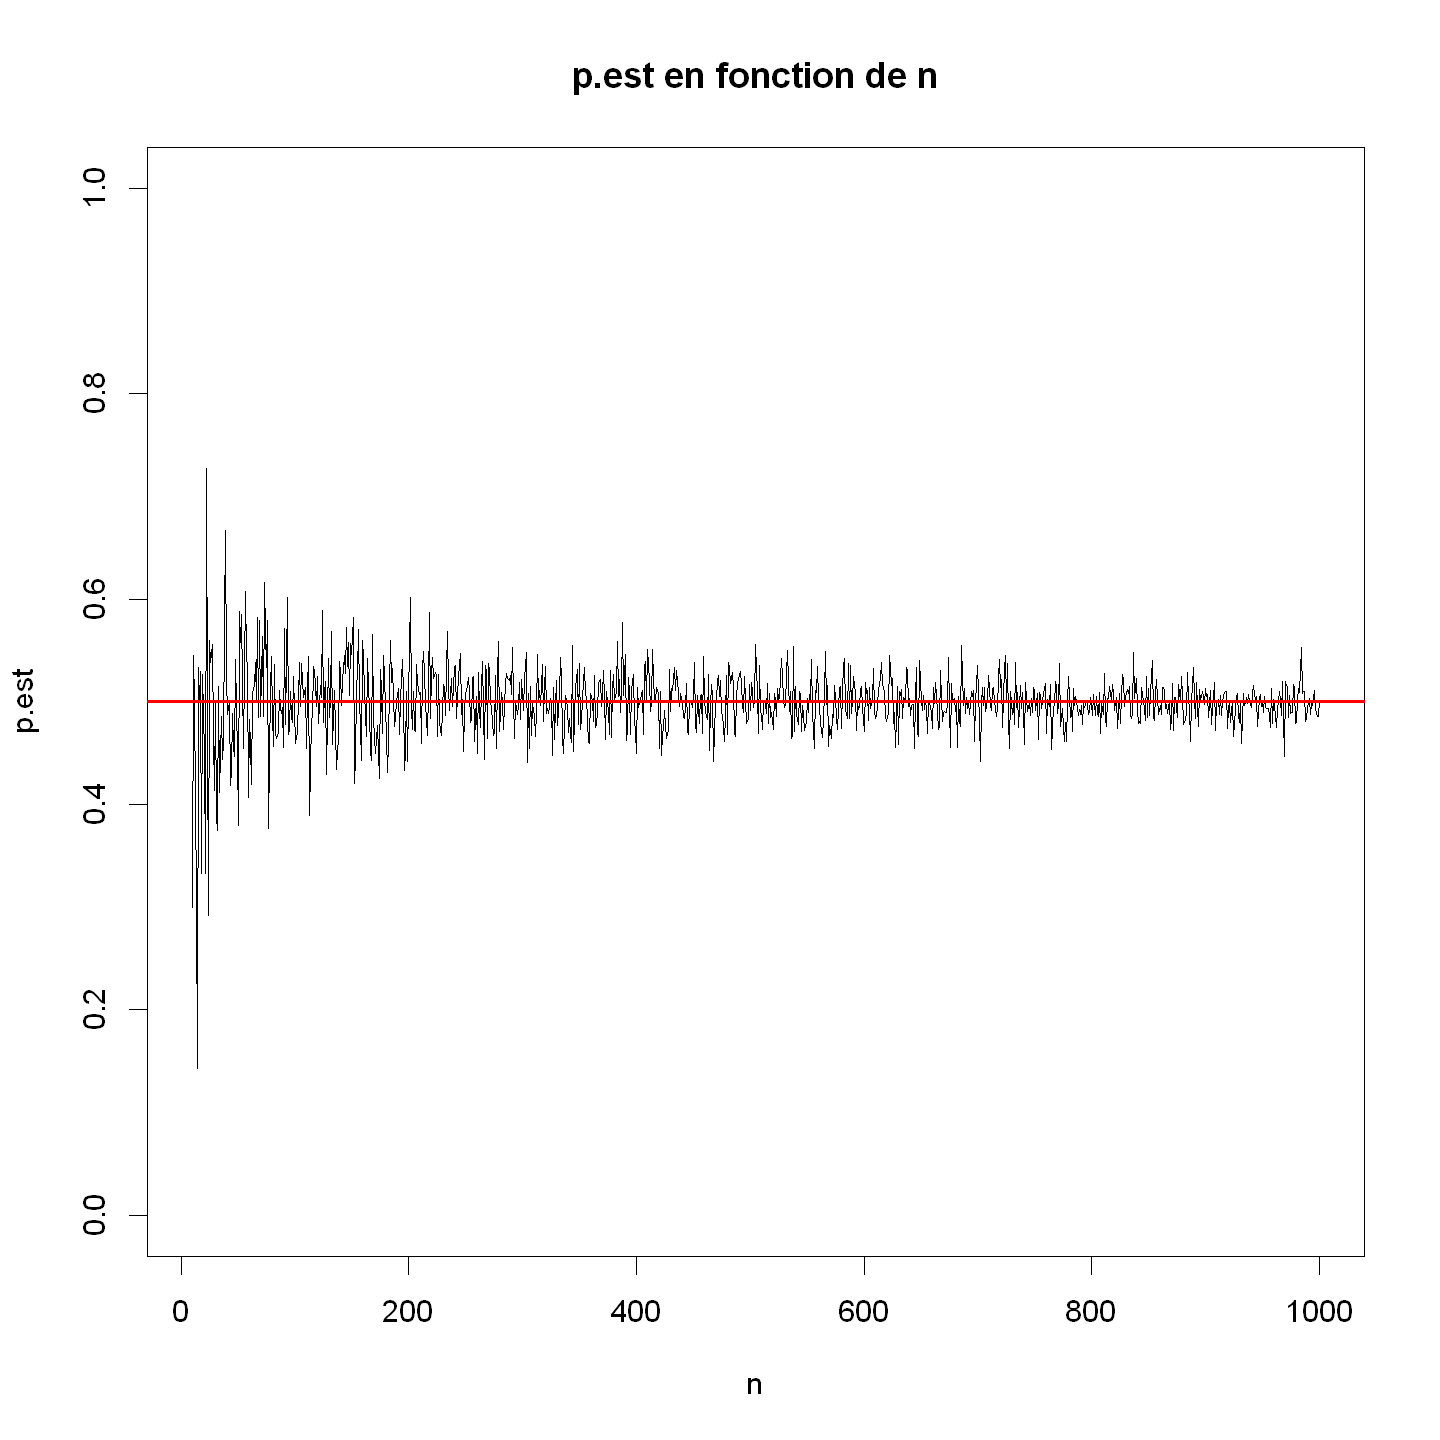

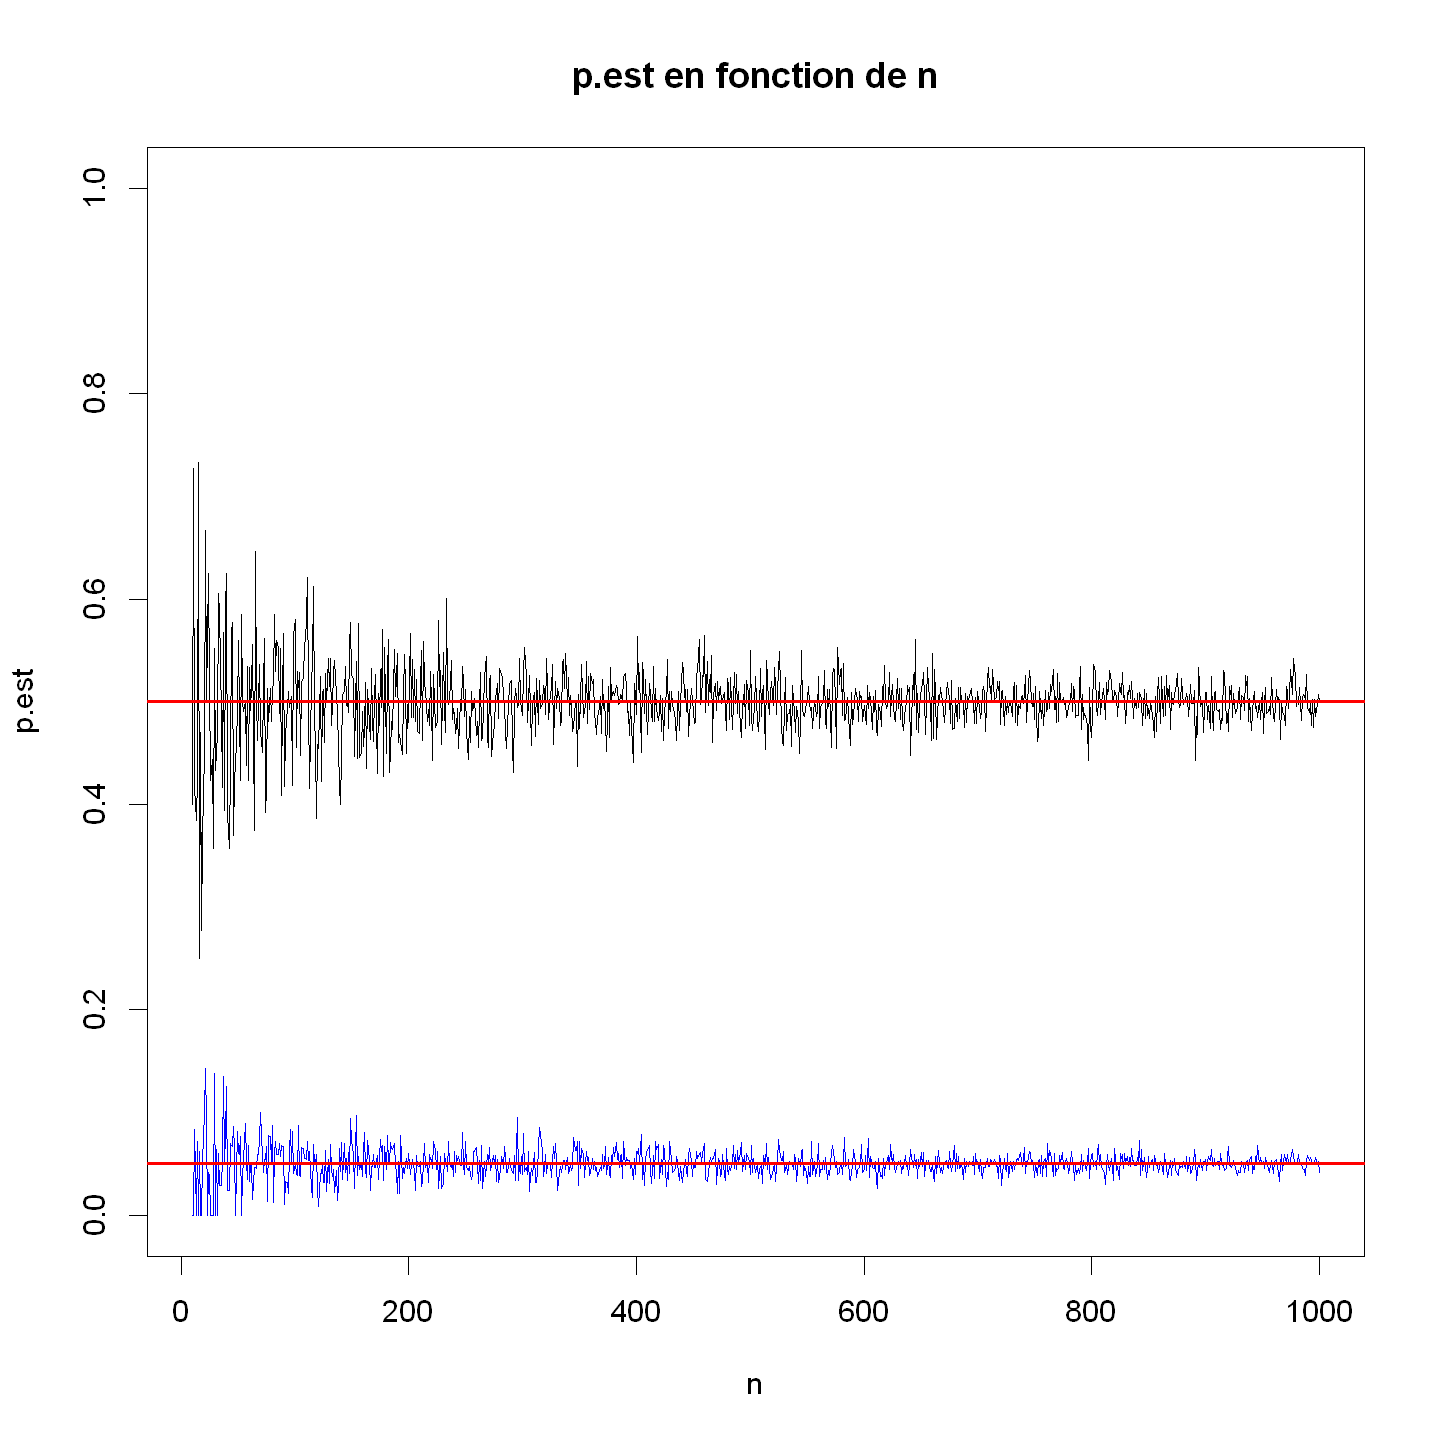

[1] 1.01

[1] 155198

[1] 1.22894148 0.39164957 0.03919894

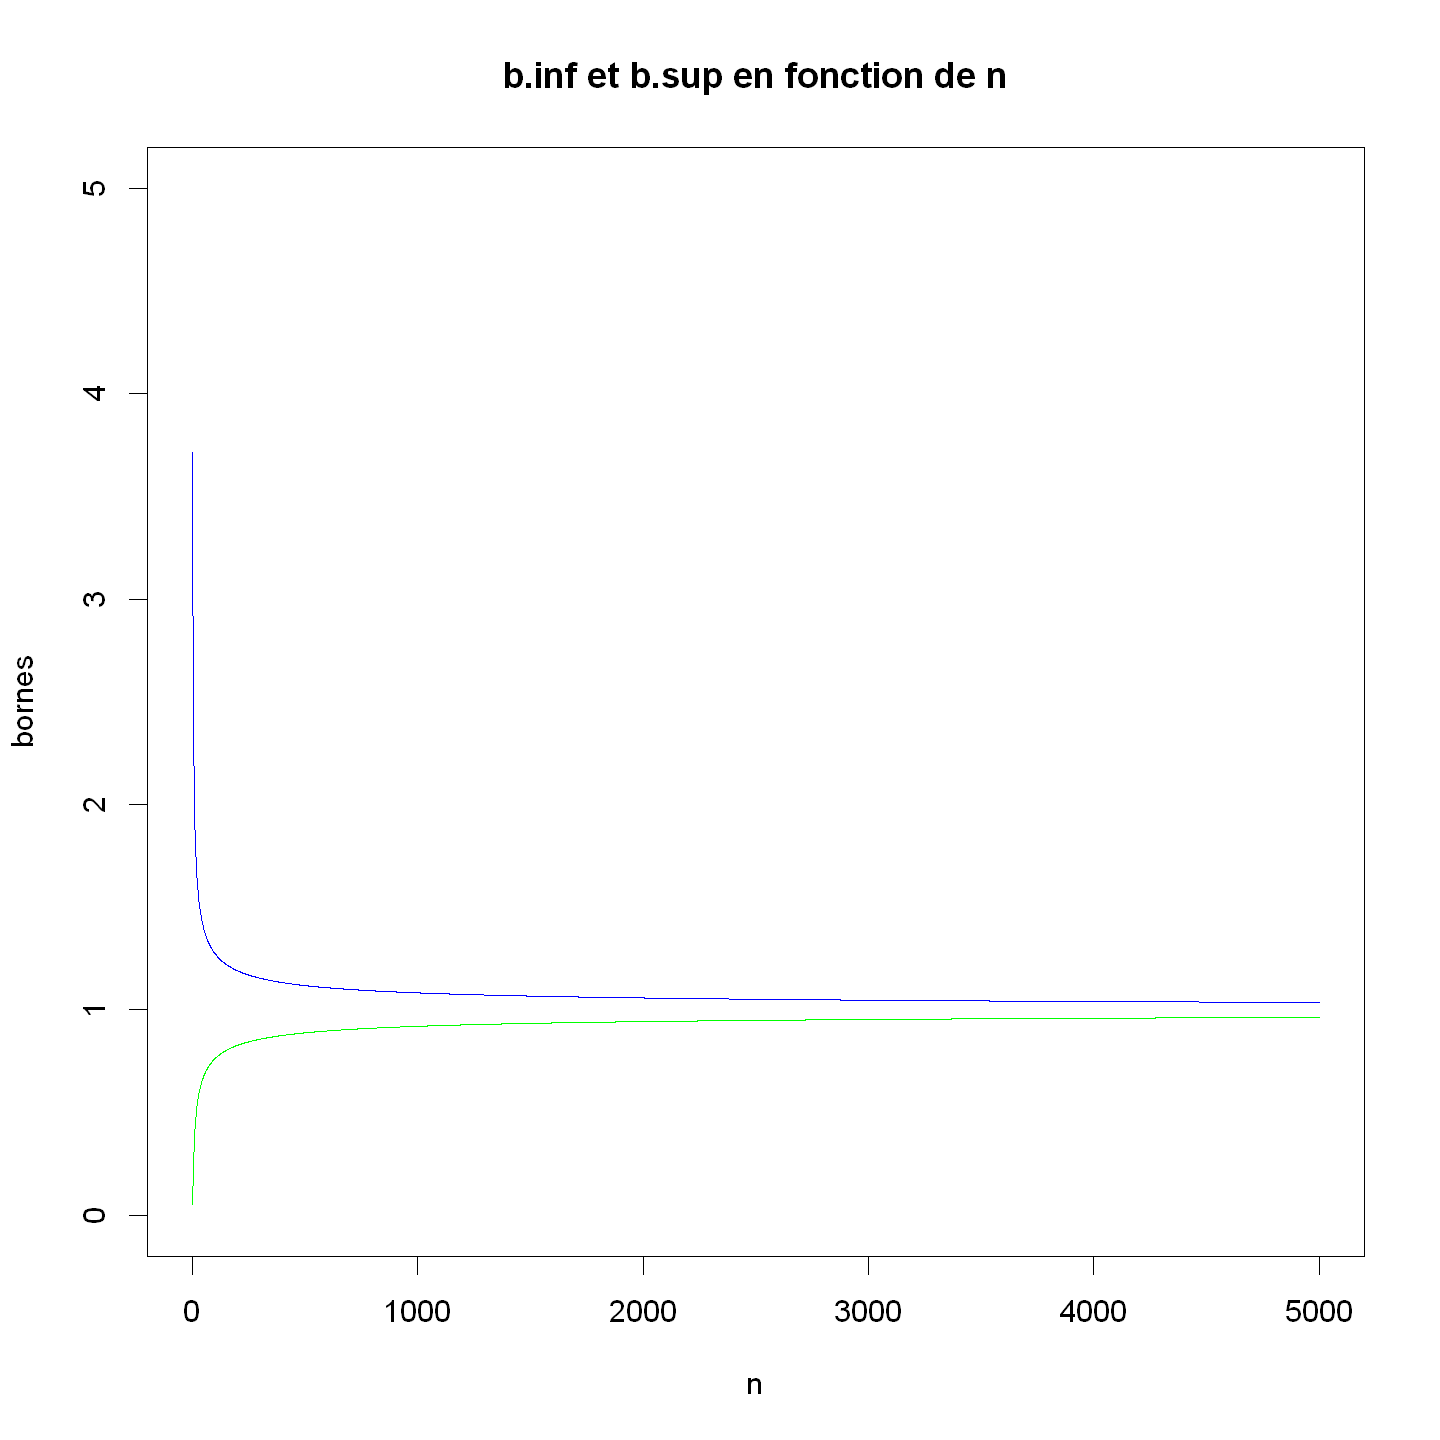

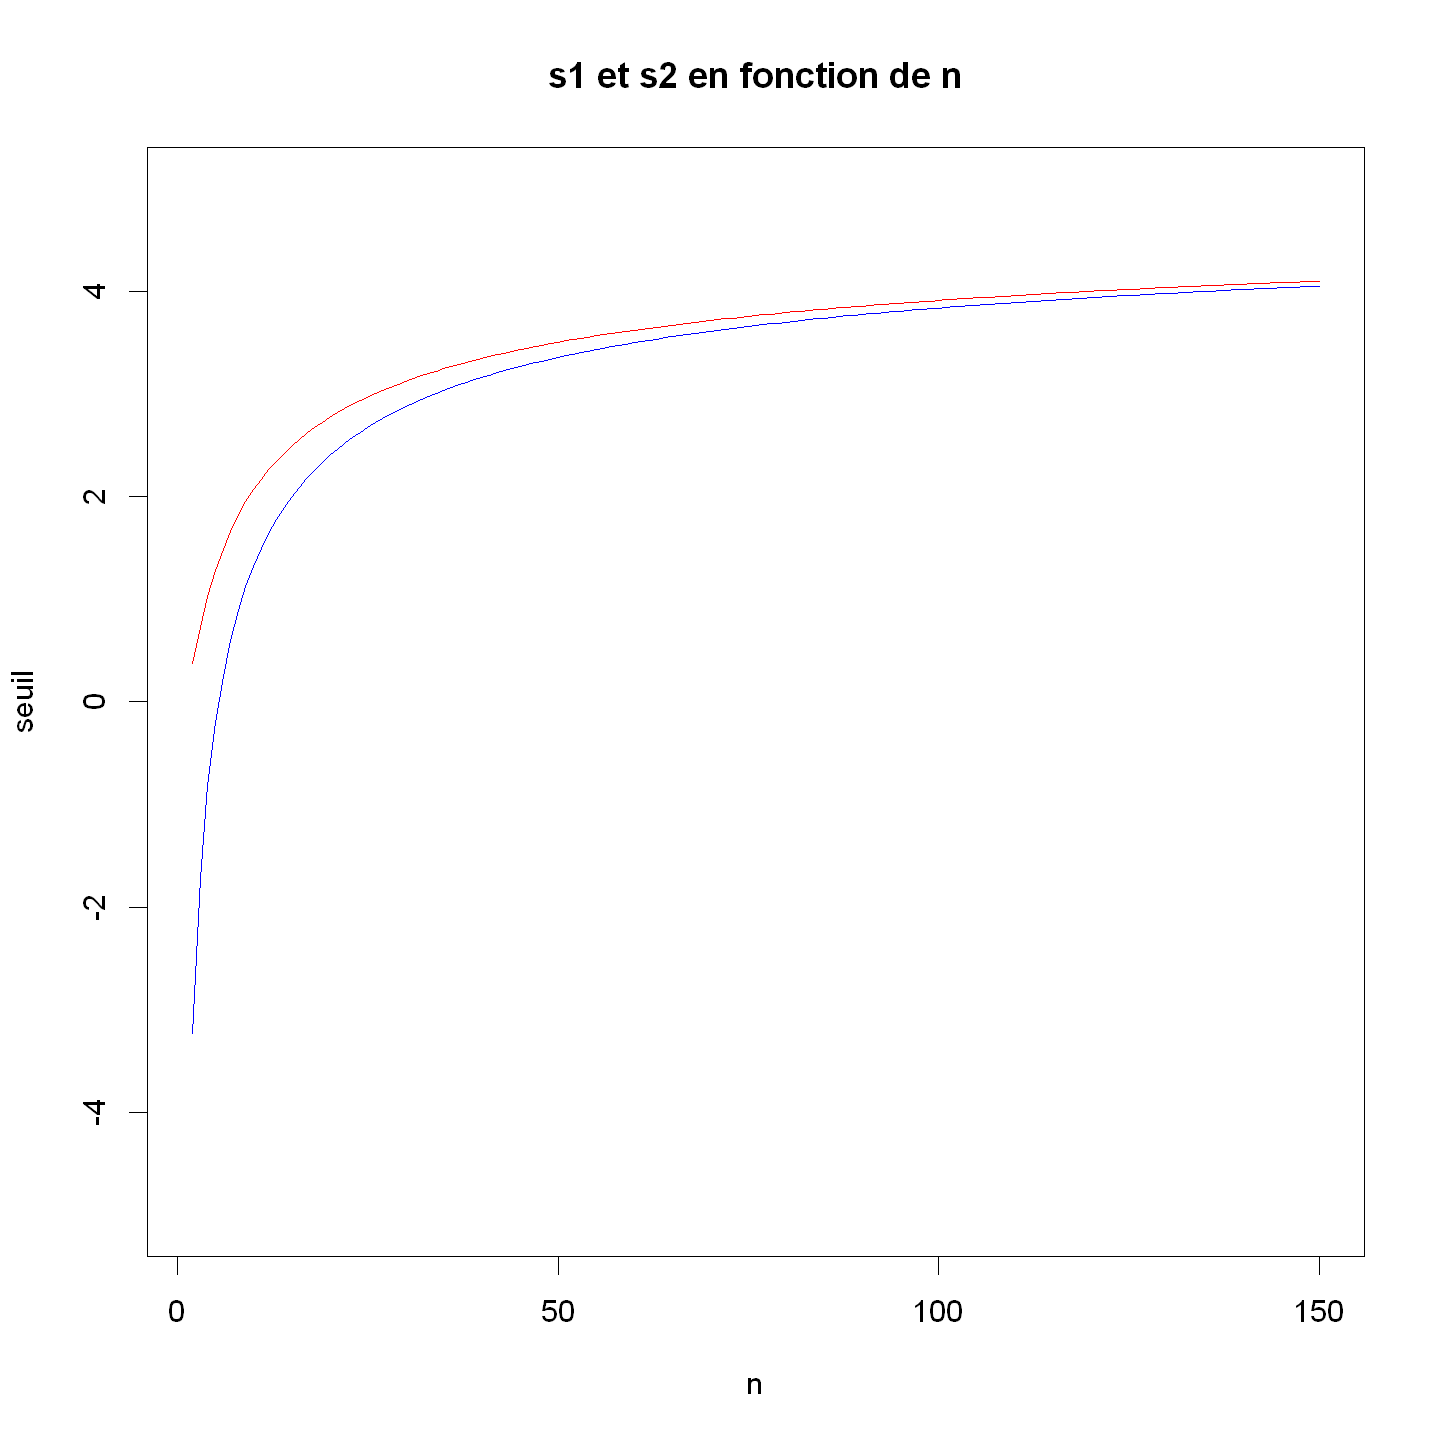

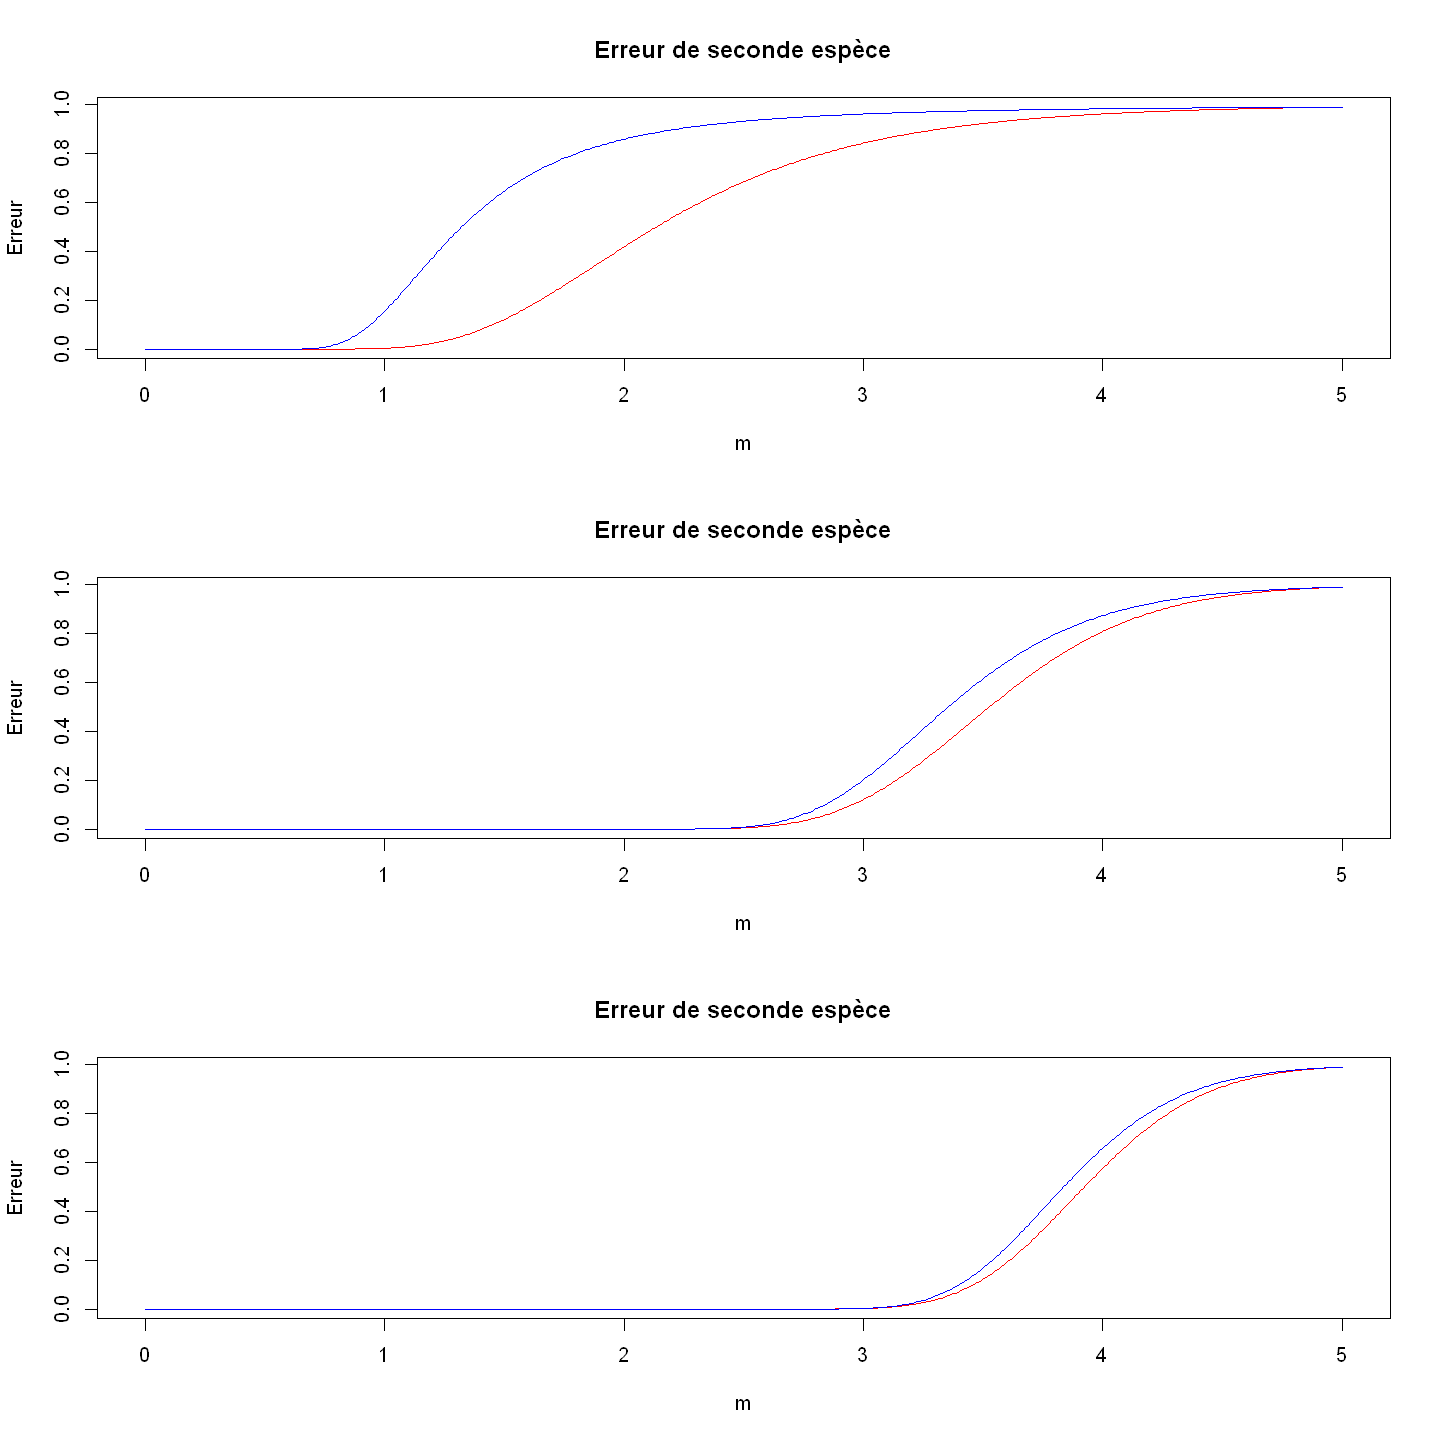

In [141]:
# EXERCICE 1 ______________________________________________________
# 1.2.1

freq.abs <- function (x,valeur) {return (length(which(x==valeur)))}
omegax <- c(-1,0,1)
px <- c(0.5,0.15,0.35)
n <- 10
K <- 10
p.est <- NULL

for(k in 1:K) {
	x <- sample(omegax,n,TRUE,px)
	p.est <- c(p.est,freq.abs(x,-1)/n)
}
p.est
mean(p.est)

# 1.2.2

freq.abs <- function (x,valeur) {return (length(which(x==valeur)))}
omegax <- c(-1,0,1)
px <- c(0.5,0.15,0.35)
n <- 10
K <- 20
p.est <- NULL

for(k in 1:K) {
	x <- sample(omegax,n,TRUE,px)
	p.est <- c(p.est,freq.abs(x,-1)/n)
}
p.est
mean(p.est)

# 1.3

freq.abs <- function (x,valeur) {return (length(which(x==valeur)))}
omegax <- c(-1,0,1)
px <- c(0.5,0.15,0.35)
p.est <- NULL

for(n in 10:1000) {
	x <- sample(omegax,n,TRUE,px)
	p.est <- c(p.est,freq.abs(x,-1)/n)
}
n <- 10:1000
plot(n,p.est, main="p.est en fonction de n", xlab="n", ylab="p.est", type='l', ylim=c(0,1))
abline(h=0.5,col="red",lwd=2)

# 1.5

freq.abs <- function (x,valeur) {return (length(which(x==valeur)))}
omegax <- c(-1,0,1)
px <- c(0.5,0.15,0.35)
p.est <- NULL

for(n in 10:1000) {
	x <- sample(omegax,n,TRUE,px)
	p.est <- c(p.est,freq.abs(x,-1)/n)
}
n <- 10:1000
plot(n,p.est, main="p.est en fonction de n", xlab="n", ylab="p.est", type='l', ylim=c(0,1))
abline(h=0.5,col="red",lwd=2)

p.est2 <- NULL
px2 <- c(0.05,0.35,0.6)
for(n in 10:1000) {
	x2 <- sample(omegax,n,TRUE,px2)
	p.est2 <- c(p.est2,freq.abs(x2,-1)/n)
}
n <- 10:1000
lines(n,p.est2, col = "blue", type='l')

abline(h=0.05, col = "red",lwd=2)



# EXERCICE 2 ______________________________________________________

# 2.2

alpha <- 0.01
b.inf <- NULL 
b.sup <- NULL

for (n in 2:5000) {
b.inf <- c(b.inf, qchisq((alpha/2),df = 2*n)/(2*n))
b.sup <- c(b.sup, qchisq(1-(alpha/2),df = 2*n)/(2*n))
}
n <- 2:5000
plot(n,b.inf, main="b.inf et b.sup en fonction de n", xlab="n", ylab="bornes", col = "green" , type='l', ylim=c(0,5))
n <- 2:5000
lines(n,b.sup, col = "blue", type='l')

# 2.3

alpha <- 0.05
i = 1
b.inf <- qchisq((alpha/2),df = 2*i)/(2*i)
b.sup <- qchisq(1-(alpha/2),df = 2*i)/(2*i)
precision <- b.sup / b.inf
while ( precision > 1.01) {
b.inf <- qchisq((alpha/2),df = 2*i)/(2*i)
b.sup <- qchisq(1-(alpha/2),df = 2*i)/(2*i)
precision <- b.sup / b.inf
i = i+1
}
precision
i

# 2.4

alpha <- 0.05
n <- c(10,100,10000)
precision <- NULL
for ( i in n) {
b.inf <- qchisq((alpha/2),df = 2*i)/(2*i)
b.sup <- qchisq(1-(alpha/2),df = 2*i)/(2*i)
precision <- c(precision, b.sup - b.inf )
}
precision


# 2.6

alpha <- 0.01
m0 = 5
s1 <- NULL 
s2 <- NULL

for (n in 2:150) {
s1 <- c(s1, m0*qchisq((alpha),df = 2*n)/(2*n))
s2 <- c(s2, m0+(m0/sqrt(n))*qnorm(alpha))
}
n <- 2:150
plot(n,s1, main="s1 et s2 en fonction de n", xlab="n", ylab="seuil", col = "red" , type='l', ylim=c(-5,5))
n <- 2:150
lines(n,s2, col = "blue", type='l')


#2.8 

par(mfrow=c(3,1))
m0 = 5
alpha = 0.01
p <- NULL
n <- c(10,50,100)
m <- seq(0,m0,length=500)
for (i in n) {
s1 = m0*qchisq((alpha),df = 2*i)/(2*i)
B1 <- (1- pchisq((2*i*s1)/m, df = 2*i))
plot(m,B1, main="Erreur de seconde espèce" , xlab="m", ylab="Erreur", col = "red", type='l')
s2 = m0+(m0/sqrt(i))*qnorm(alpha)
B2 <- (pnorm(-1*(sqrt(i)*(s2-m)/m)))
lines(m,B2, col = "blue", type='l')
}





***